# Задача
Коллеги подготовили для вас домашнее задание на классификацию.
В рамках задания вам предлагается решить задачу и сразиться между собой в качестве
Задача по предсказанию согласится ли клиент на депозит (для участия нужна регистрация на kaggle.com)
https://www.kaggle.com/t/8e5b622c6e41422794d3c593c85d59f8
Нужно решить задачу с помощью 3х методов:
- кнн
- дерева принятия решения
- логистической регрессии
и залить на ваш взгляд лучшее решение.
Для зачета нужно:
- предоставить ноутбук с кодом где вы попробовали все 3 метода
- залить предсказания для теста и найти себя в лидерборде (скоро там появится бейзлайн - минимальное решение которое нужно побить по качеству чтоб получить зачет)
Первые 3 места получат дополнительный балл.
Метрика качества ROC-AUC
Дедлайн расширен - 10 дней (14 мая 3 ночи по Москве)

In [2]:
import pandas as pd

In [3]:
from IPython.display import HTML, display
description = pd.DataFrame(data=[
    ["_id", "идентификатор человека", "Данные по клиенту"],
    ["age", "возраст", "Данные по клиенту"],
    ["job", "тип работы (admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown)", "Данные по клиенту"],
    ["marital", "семейное положение (divorced (разведенный и овдовевший),married,single,unknown)", "Данные по клиенту"],
    ["education", "уровень образования (basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown)", "Данные по клиенту"],
    ["default", "есть ли дефолт по кредиту (no,yes,unknown)", "Данные по клиенту"],
    ["housing", "есть ли кредит на жилье (no,yes,unknown)", "Данные по клиенту"],
    ["loan", "есть ли персональный кредит (no,yes,unknown)", "Данные по клиенту"],
    ["contact", "контактный тип связи (cellular,telephone)", "Данные по клиенту"],
    ["month", "последний контактный месяц года (jan, feb, mar, ..., nov, dec)", "Данные по клиенту"],
    ["day_of_week", "последний контактный день недели (mon,tue,wed,thu,fri)", "Данные по клиенту"],
    ["duration", "длительность последнего контакта в секундах. (Важное замечание: этот атрибут сильно влияет на таргет (например, если длительность - 0 сек., то таргет - 0). Тем не менее, продолжительность не известна до выполнения вызова.", "Данные по клиенту"],
    ["campaign", "количество контактов, выполненных для этого клиента в рамках текущей маркетинговой кампании (включая последний контакт)", "Данные по клиенту"],
    ["pdays", "количество дней прошедших последнего контакта с клиентом с предыдущей маркетинговой кампании (999 означает, что ранее с клиентом не контактировали)", "Данные по клиенту"],
    ["previous", "количество контактов, выполненных до текущей маркетинговой кампании для этого клиента", "Данные по клиенту"],
    ["poutcome", "результат предыдущей маркетинговой кампании (failure,nonexistent,success)", "Данные по клиенту"],
    ["emp.var.rate", "изменение уровня занятости (квартальный показатель)", "Внешние данные"],
    ["cons.price.idx", "индекс потребительских цен (ежемесячный показатель)", "Внешние данные"],
    ["cons.conf.idx", "индекс доверия потребителя (ежемесячный показатель)", "Внешние данные"],
    ["euribor3m", "курс Euribor (ежедневный показатель)", "Внешние данные"],
    ["nr.employed", "количество сотрудников (квартальный показатель)", "Внешние данные"]
],columns=['field','description','context']).set_index('field')
description

,description,context
field,,
_id,идентификатор человека,Данные по клиенту
age,возраст,Данные по клиенту
job,"тип работы (admin.,blue-collar,entrepreneur,ho...",Данные по клиенту
marital,семейное положение (divorced (разведенный и ов...,Данные по клиенту
education,"уровень образования (basic.4y,basic.6y,basic.9...",Данные по клиенту
default,"есть ли дефолт по кредиту (no,yes,unknown)",Данные по клиенту
housing,"есть ли кредит на жилье (no,yes,unknown)",Данные по клиенту
loan,"есть ли персональный кредит (no,yes,unknown)",Данные по клиенту
contact,"контактный тип связи (cellular,telephone)",Данные по клиенту


In [4]:
train = pd.read_csv('train.csv', index_col="_id")
X_test  = pd.read_csv('test.csv', index_col="_id")

In [5]:
y_train = train['target']
X_train = train.drop(columns='target')

## Анализ данных

In [6]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
_id,,,,,,,,,,,,,,,,,,,,,
df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,fri,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [7]:
train.shape

(24712, 21)

[[['duration', 'euribor3m'], 15625],
 [['age', 'duration'], 14148],
 [['duration', 'cons.price.idx'], 7658],
 [['duration', 'cons.conf.idx'], 7658],
 [['job', 'duration'], 6568],
 [['month', 'duration'], 5574],
 [['duration', 'campaign'], 5322],
 [['duration', 'nr.employed'], 5270],
 [['education', 'duration'], 5249],
 [['duration', 'emp.var.rate'], 5010],
 [['day_of_week', 'duration'], 4391],
 [['age', 'euribor3m'], 3970],
 [['marital', 'duration'], 2958],
 [['housing', 'duration'], 2670],
 [['duration', 'previous'], 2532],
 [['loan', 'duration'], 2494],
 [['duration', 'poutcome'], 2458],
 [['contact', 'duration'], 2279],
 [['duration', 'target'], 2217],
 [['default', 'duration'], 2199],
 [['duration', 'pdays'], 2150],
 [['job', 'euribor3m'], 1755],
 [['campaign', 'euribor3m'], 1431],
 [['education', 'euribor3m'], 1290],
 [['age', 'cons.price.idx'], 1181],
 [['age', 'cons.conf.idx'], 1181],
 [['age', 'campaign'], 851],
 [['pdays', 'euribor3m'], 787],
 [['previous', 'euribor3m'], 782],

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24712 entries, df7489733b004bbe40d3d37b34f82419 to 46d0d25dfd1def79632dd437261d0b5c
Data columns (total 21 columns):
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64

In [9]:
feauters_numeric=[]
feauters_category=[]
for cname in train.columns:
    if cname in description.index: 
        if train.dtypes[cname] == object:
            feauters_category.append(cname)
        else:
            feauters_numeric.append(cname)

In [118]:
for cname in train.columns:
    if (train.dtypes[cname] != object) & (cname in description.index):    
        print("{}: уникальных {}; описание: {}\n".format(
            cname,
            len(train[cname].unique()),
            description.loc[cname, 'description']
        ))

age: уникальных 77; описание: возраст

duration: уникальных 1384; описание: длительность последнего контакта в секундах. (Важное замечание: этот атрибут сильно влияет на таргет (например, если длительность - 0 сек., то таргет - 0). Тем не менее, продолжительность не известна до выполнения вызова.

campaign: уникальных 40; описание: количество контактов, выполненных для этого клиента в рамках текущей маркетинговой кампании (включая последний контакт)

pdays: уникальных 26; описание: количество дней прошедших последнего контакта с клиентом с предыдущей маркетинговой кампании (999 означает, что ранее с клиентом не контактировали)

previous: уникальных 7; описание: количество контактов, выполненных до текущей маркетинговой кампании для этого клиента

emp.var.rate: уникальных 10; описание: изменение уровня занятости (квартальный показатель)

cons.price.idx: уникальных 26; описание: индекс потребительских цен (ежемесячный показатель)

cons.conf.idx: уникальных 26; описание: индекс доверия по

In [11]:
def print_column_info(df, cname):
    print("{}: {}".format(
            cname,
            description.loc[cname, 'description']
        ))
    if len(df[cname].unique())>20:
        print('первые 50 уникальных значений: {}'.format( list(df[cname].unique())[:20] ) )
    else:
        print(df.groupby(cname).agg({cname:'count', 'target':'mean'}).sort_values(by="target"))
    print('\n\n')

In [12]:
def print_grouped_column_info(df, cname, group_by):
    
    df=df.copy()
    df['row_counter'] = 1
    
    print("{}: {}".format(
            cname,
            description.loc[cname, 'description']
        ))
    
    if len(df[cname].unique())>20:
        print('первые 50 уникальных значений: {}'.format( list(df[cname].unique())[:20] ) )
    else:
        print(pd.pivot_table(df, values=['target','row_counter'], index=[cname], columns=[group_by], aggfunc={'row_counter':'count', 'target':'mean'}).sort_values([('target', 'train')]))
    print('\n\n')    

In [205]:
def get_feauters_combinations(columns, n):    
        
    comb = []
    
    if n == 2:
        for i, item in enumerate(columns[:(-n+1)]):
            for subitem in columns[i+1:]:
                comb.append([item, subitem])
    
    else:
        for i, item in enumerate(columns[:(-n+1)]):
            for subitems in get_feauters_combinations(columns[i+1:], n-1):
                comb.append([item] + subitems)
                
    return comb

In [13]:
train_test = pd.concat([train, X_test], axis=0, keys=['train','test'], names=['csv','_id']).reset_index(level='csv')

In [14]:
for cname in train.columns:
    if train.dtypes[cname] == object:    
        print_grouped_column_info(train_test, cname, 'csv')

job: тип работы (admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown)
              row_counter          target
csv                  test train     train
job                                      
blue-collar          3633  5621  0.071873
services             1578  2391  0.079046
entrepreneur          603   853  0.085580
housemaid             408   652  0.098160
unknown               133   197  0.101523
self-employed         571   850  0.102353
technician           2756  3987  0.107600
management           1166  1758  0.115472
admin.               4168  6254  0.131916
unemployed            420   594  0.144781
retired               719  1001  0.239760
student               321   554  0.301444



marital: семейное положение (divorced (разведенный и овдовевший),married,single,unknown)
         row_counter           target
csv             test  train     train
marital                              
married        10057  14

### Оцифровка категорий

In [15]:
category_mapper = {
    'job':{
        'blue-collar': 0.071873,
        'services': 0.079046,
        'entrepreneur': 0.085580,
        'housemaid': 0.098160,
        'unknown': 0.101523,
        'self-employed': 0.102353,
        'technician': 0.107600,
        'management': 0.115472,
        'admin.': 0.131916,
        'unemployed': 0.144781,
        'retired': 0.239760,
        'student': 0.301444
    },
    'marital':{
#        'divorced' : 3,
#        'married' : 2,
#        'single' : 1,
#        'unknown' : 0
        'married': 0.101338,
        'divorced': 0.105626,
        'unknown': 0.133333,
        'single': 0.139611
    },
    'education':{
#        'unknown' : 0,
#        'illiterate' : 1,
#        'basic.4y' : 2,
#        'basic.6y' : 3,
#        'basic.9y' : 4,
#        'high.school' : 5,
#        'professional.course' : 6,
#        'university.degree' : 7
        'illiterate': 0.000000,
        'basic.9y': 0.079102,
        'basic.6y': 0.080057,
        'basic.4y': 0.104637,
        'high.school': 0.105804,
        'professional.course': 0.110219,
        'unknown': 0.133962,
        'university.degree': 0.141880
    },
    'default': {
        'no' : -1,
        'unknown' : 0,
        'yes' : 1
    },
    'housing' : {
        'no' : -1,
        'unknown' : 0,
        'yes' : 1
    },
    'loan' : {
        'no' : -1,
        'unknown' : 0,
        'yes' : 1
    },
    'contact' : {
        'cellular' : 1,
        'telephone' : 0
    },
    'month' : {
#        'apr' : 4,
#        'aug' : 8,
#        'dec' : 12,
#        'jul' : 7,
#        'jun' : 6,
#        'mar' : 3,
#        'may' : 5,
#        'nov' : 11,
#        'oct' : 10,
#        'sep' : 9        
        'may': 0.061349,
        'jul': 0.092346,
        'nov': 0.103918,
        'aug': 0.105334,
        'jun': 0.109683,
        'apr': 0.200255,
        'dec': 0.449541,
        'sep': 0.451039,
        'oct': 0.459276,
        'mar': 0.485549,
    },
    'day_of_week' : {
#        'fri' : 5,
#        'mon' : 1,
#        'thu' : 4,
#        'tue' : 2,
#        'wed' : 3
        'mon': 0.099941,
        'fri': 0.109072,
        'wed': 0.113383,
        'tue': 0.117416,
        'thu': 0.123834
    },
    'poutcome' : {
        'failure' : -1,
        'nonexistent' : 0,
        'success' : 1
    }
}

category_ohe = [
#    'job',
#    'marital'
]

In [396]:
category_mapper = {
    'job':{
        'blue-collar': 0.071873,
        'services': 0.079046,
        'entrepreneur': 0.085580,
        'housemaid': 0.098160,
        'unknown': 0.101523,
        'self-employed': 0.102353,
        'technician': 0.107600,
        'management': 0.115472,
        'admin.': 0.131916,
        'unemployed': 0.144781,
        'retired': 0.239760,
        'student': 0.301444
    },
    'marital':{
        'divorced' : 3,
        'married' : 2,
        'single' : 1,
        'unknown' : 0
    },
    'education':{
        'unknown' : 0,
        'illiterate' : 1,
        'basic.4y' : 2,
        'basic.6y' : 3,
        'basic.9y' : 4,
        'high.school' : 5,
        'professional.course' : 6,
        'university.degree' : 7
    },
    'default': {
        'no' : 0,
        'unknown' : 1,
        'yes' : 1
    },
    'housing' : {
        'no' : 0,
        'unknown' : 1,
        'yes' : 2
    },
    'loan' : {
        'no' : 0,
        'unknown' : 1,
        'yes' : 2
    },
    'contact' : {
        'cellular' : 1,
        'telephone' : 0
    },
    'month' : {
        'apr' : 4,
        'aug' : 8,
        'dec' : 12,
        'jul' : 7,
        'jun' : 6,
        'mar' : 3,
        'may' : 5,
        'nov' : 11,
        'oct' : 10,
        'sep' : 9        
    },
    'day_of_week' : {
        'fri' : 5,
        'mon' : 1,
        'thu' : 4,
        'tue' : 2,
        'wed' : 3
    },
    'poutcome' : {
        'failure' : 1,
        'nonexistent' : 0,
        'success' : 2
    }
}


In [511]:
def map_categories(df, mapper, one_hot):
    df = df.copy()
    
    category_mapper = [x for x in mapper if ~(x in one_hot)]
    
    for key, value in mapper.items():
        df.loc[:,key] = df.loc[:,key].map(lambda x: value[x])
    
    df = pd.get_dummies(df, columns=one_hot)    
    
    df['cons.conf.idx']=-df['cons.conf.idx']
    
    rules = [
        ['duration', 60, 10],
        ['campaign', 5, 4],
        ['cons.price.idx', 0.4 ,10],
        ['cons.conf.idx', 5, 8],
        ['euribor3m', 0.5, 50],
        ['age', 5, 16]
    ]
    
    for col, d_step, d_count in rules:
        df[col] = df[col].map(lambda x: x // d_step*d_step if (x//d_step < d_count) else d_count*d_step)
        
        
    
    return df

In [ ]:
for category in category_mapper:
    X = map_categories(df_train, )
    test_predict_by_feauters(X, y, best_columns)

In [18]:
%matplotlib inline
from matplotlib import pyplot, colors

In [127]:
def show_scatter(df, x, y, hue, agg_func, ax, norm = None):
    df=df.groupby([x, y]).agg({hue:agg_func, x:'count'}).rename(columns={x:'count'}).reset_index()
    df.plot.scatter(x=x,y=y,c=hue,s=(df['count']/df['count'].max()*200+10), ax=ax, cmap=pyplot.cm.winter_r, norm=norm)

def show_hist(df, feauter, hue, ax):
    df = df.copy()
    df['row_counter'] = 1
    df.pivot_table('row_counter', index=[feauter], columns=[hue], aggfunc='count').plot(kind='bar', stacked=True, cmap=pyplot.cm.winter_r, ax=ax)
        
def pairplot_scatter(df, x_vars, y_vars, hue, agg_func):
           
    df = df.copy()
    
    x_vars = [x for x in x_vars if (x in df.columns)]
    y_vars = [x for x in y_vars if (x in df.columns)]
    x_vars.remove(hue)
    y_vars.remove(hue)
    
    for cname in (y_vars + x_vars):
        if len(df[cname].unique())>20:
            step = (df[cname].max() - df[cname].min())/10
            df[cname] = df[cname] // step * step
    
    fig, axes = pyplot.subplots(nrows=len(y_vars), ncols=len(x_vars), squeeze=False, figsize=(min(40,len(x_vars)*7), len(y_vars)*5))
    
    for idx, x in enumerate(x_vars):
        for idy, y in enumerate(y_vars):
            if ~(x in [y]):
                show_scatter(df, x, y, hue, agg_func, axes[idy, idx])
            else:
                show_hist(df, x, hue, axes[idy, idx])


In [114]:
def pairplot_scatter_pairs(df, pair_vars, hue, agg_func, norm):
           
    df = df.copy()
    
    pair_vars = [x for x in pair_vars if not (hue in x)]    
    
    for cnames in pair_vars:
        for cname in cnames:
            if len(df[cname].unique())>20:
                step = (df[cname].max() - df[cname].min())/10
                df[cname] = df[cname] // step * step
    
    cols = 4
    rows = len(pair_vars) // cols
    fig, axes = pyplot.subplots(nrows=rows, ncols=cols, squeeze=False, figsize=(35, rows*5))

    for id, (x, y) in enumerate(pair_vars):
            if not (x in [y, hue]):
                show_scatter(df, x, y, hue, agg_func, axes[id // cols, id % cols], norm)
            else:
                show_hist(df, x, hue, axes[id // cols, id % cols])

In [124]:
def pairplot_feauter(feauter):
    pairplot_scatter_pairs(
    map_categories(train, category_mapper, []), 
    [[feauter]+[x] for x in train.columns if ~(x in [feauter])], 
    'target', 
    'mean', 
    colors.Normalize(vmin=0, vmax=1)
)

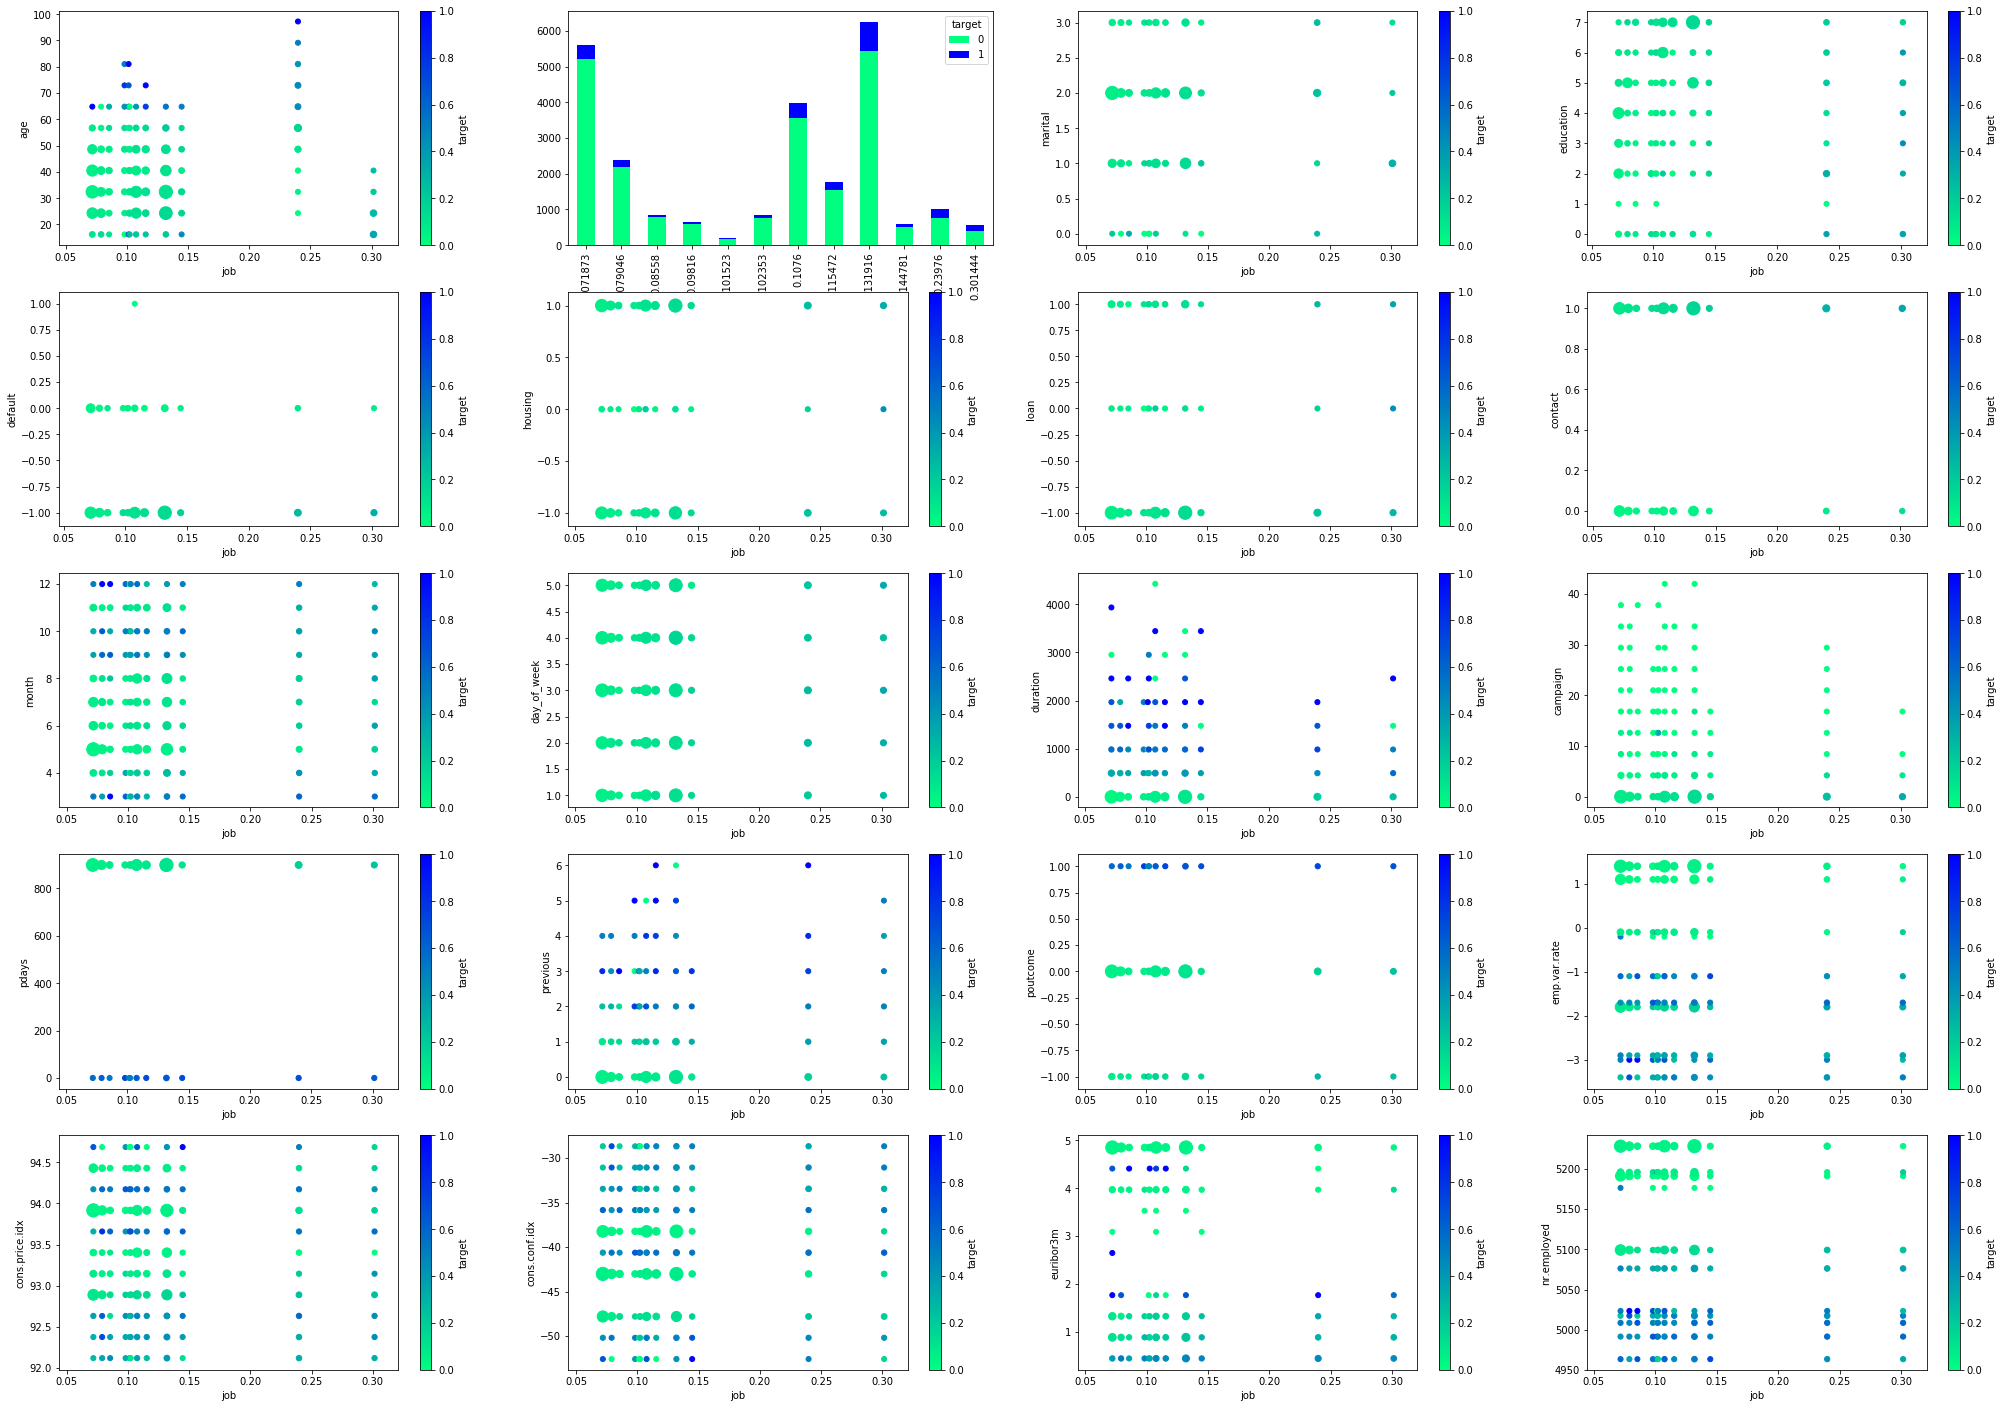

In [115]:
pairplot_feauter('job')

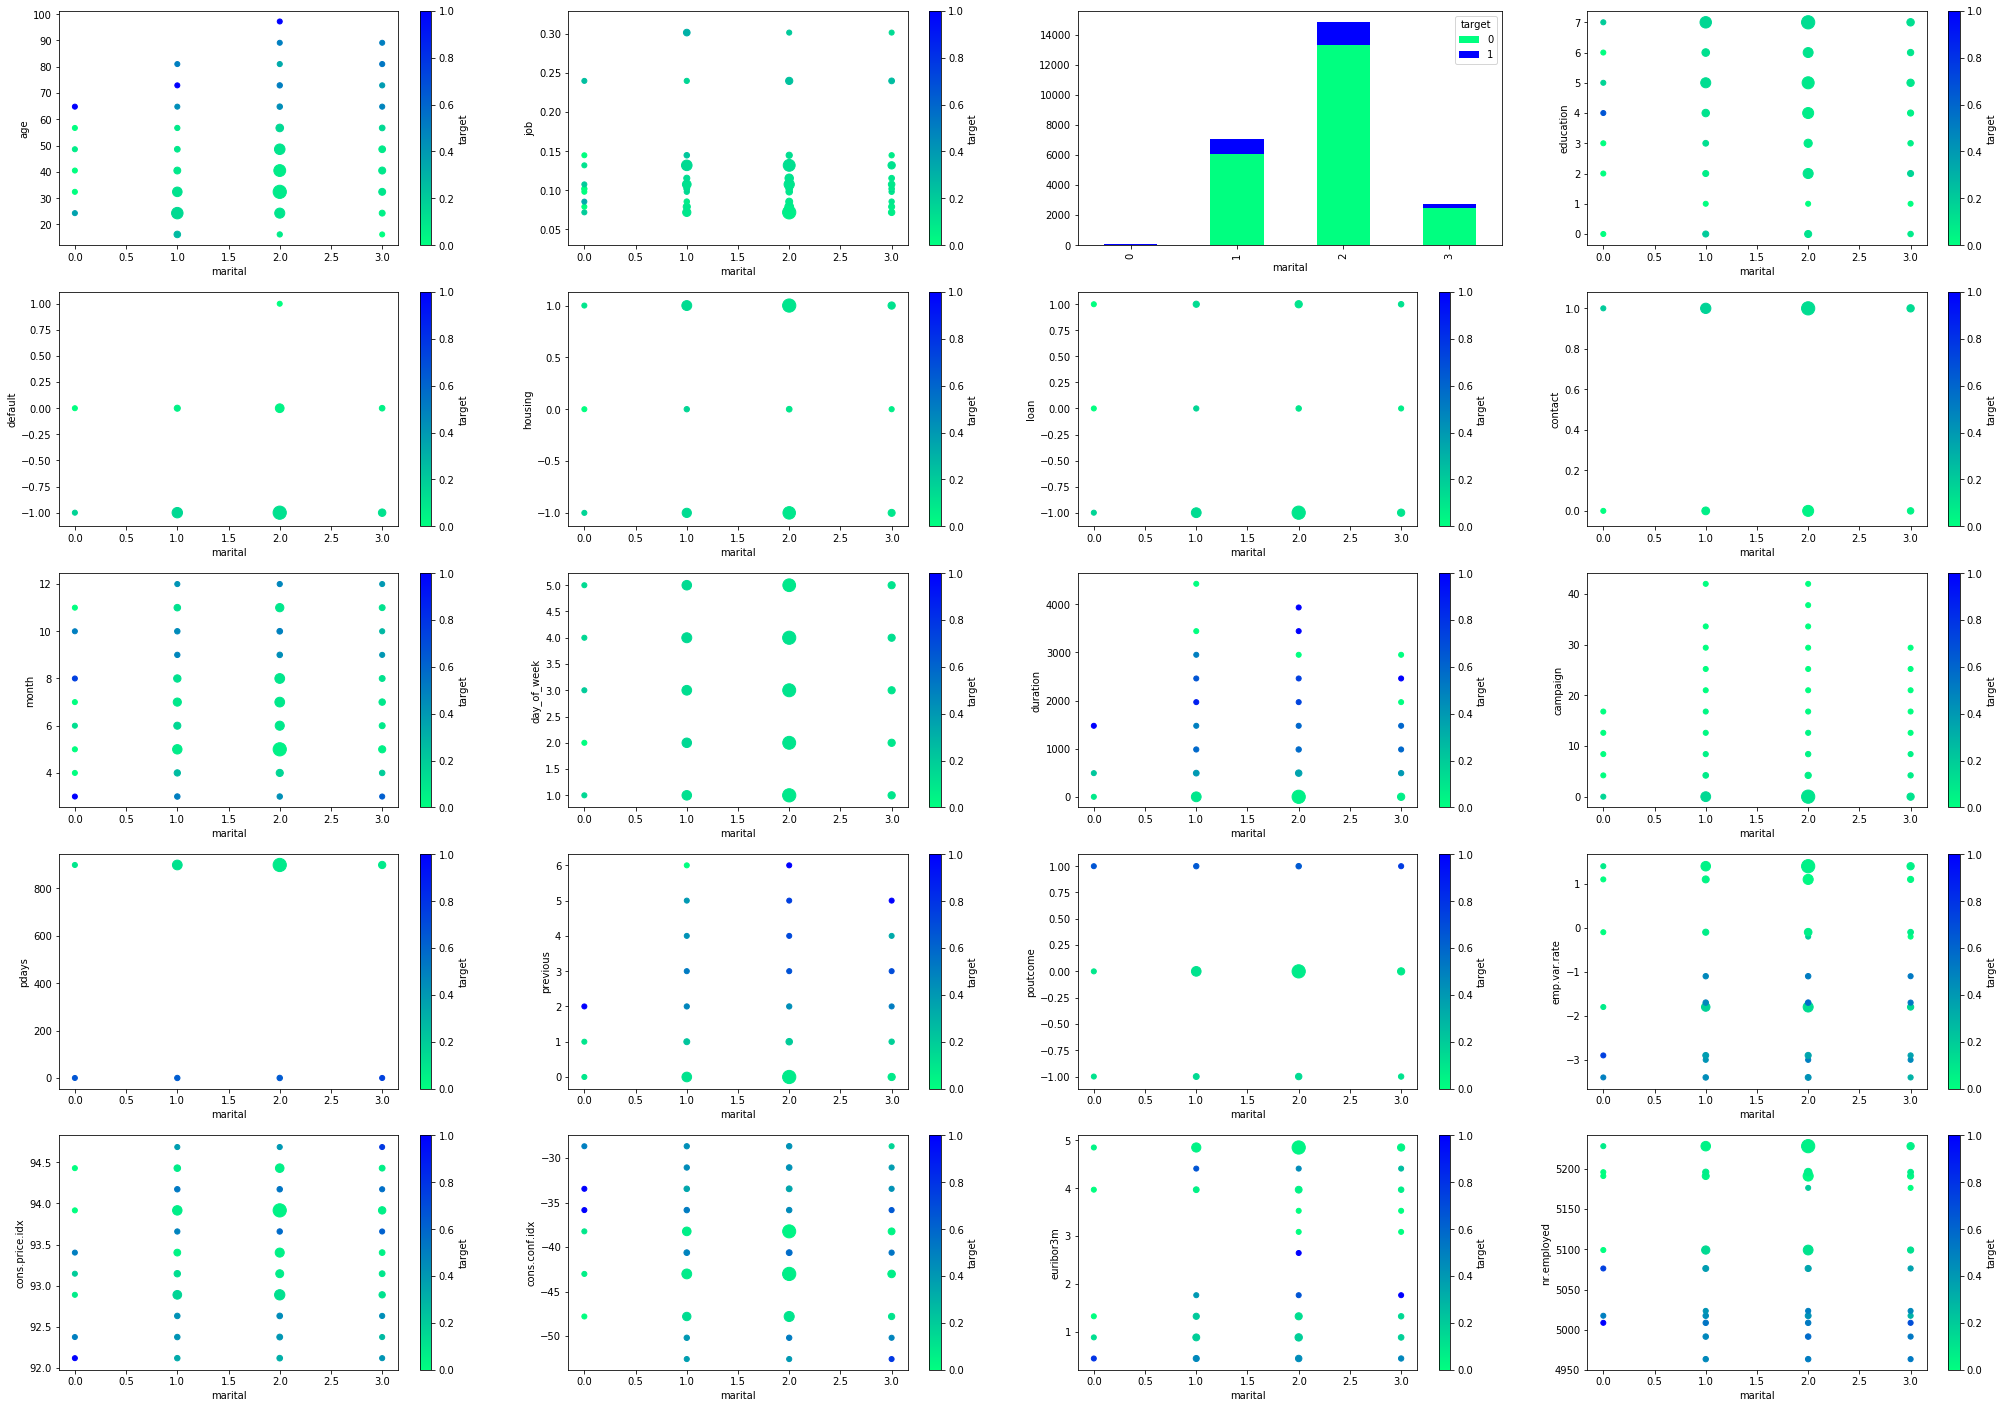

In [117]:
pairplot_feauter('marital')

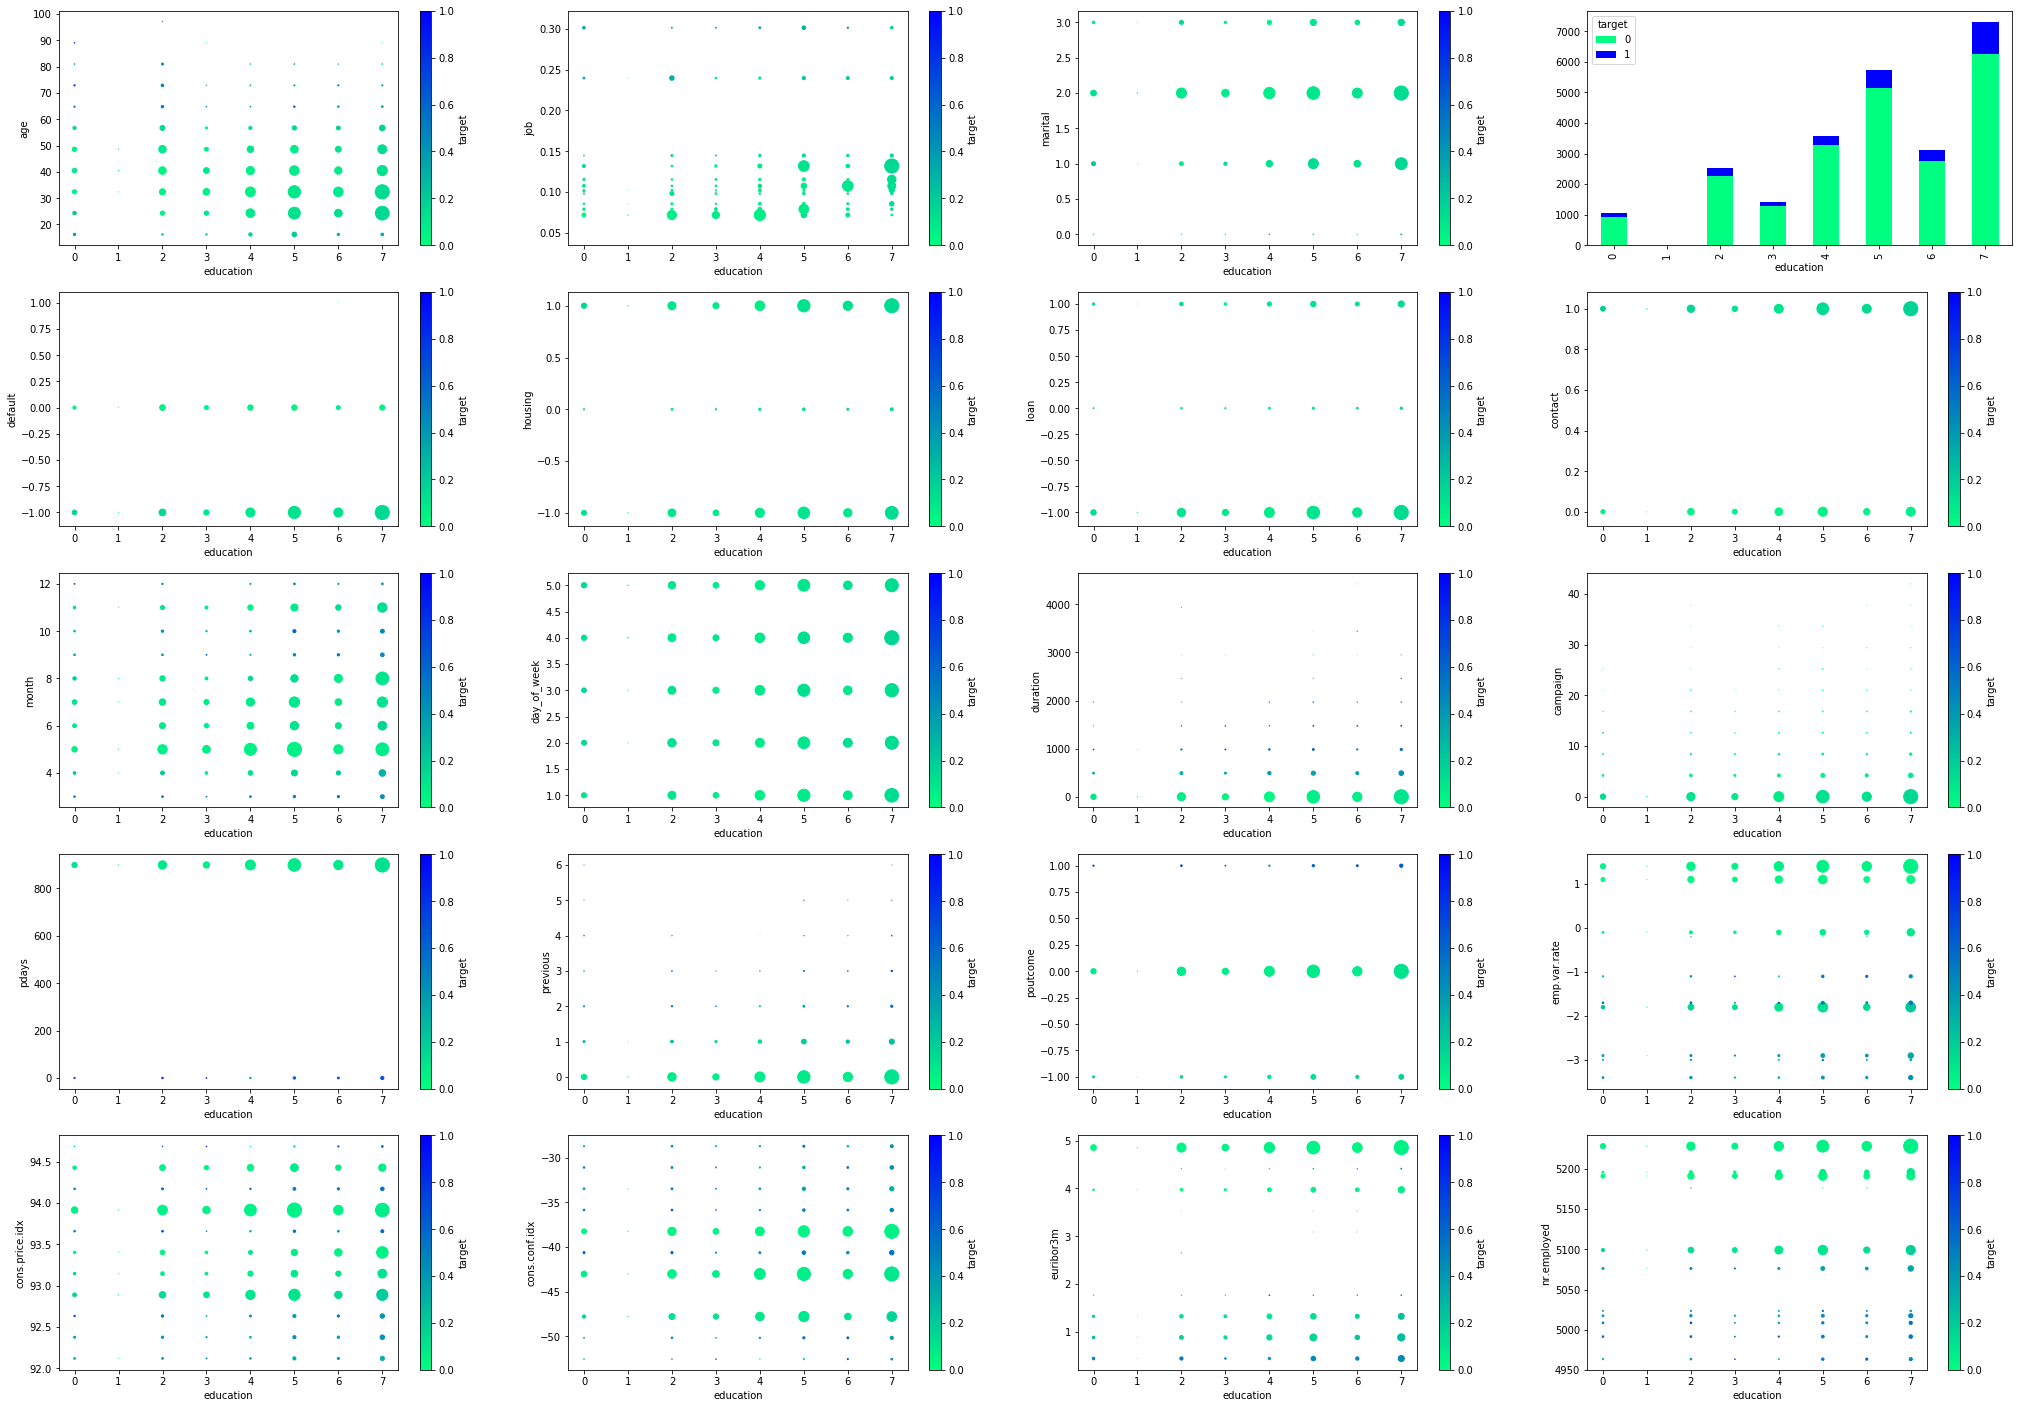

In [122]:
pairplot_feauter('education')

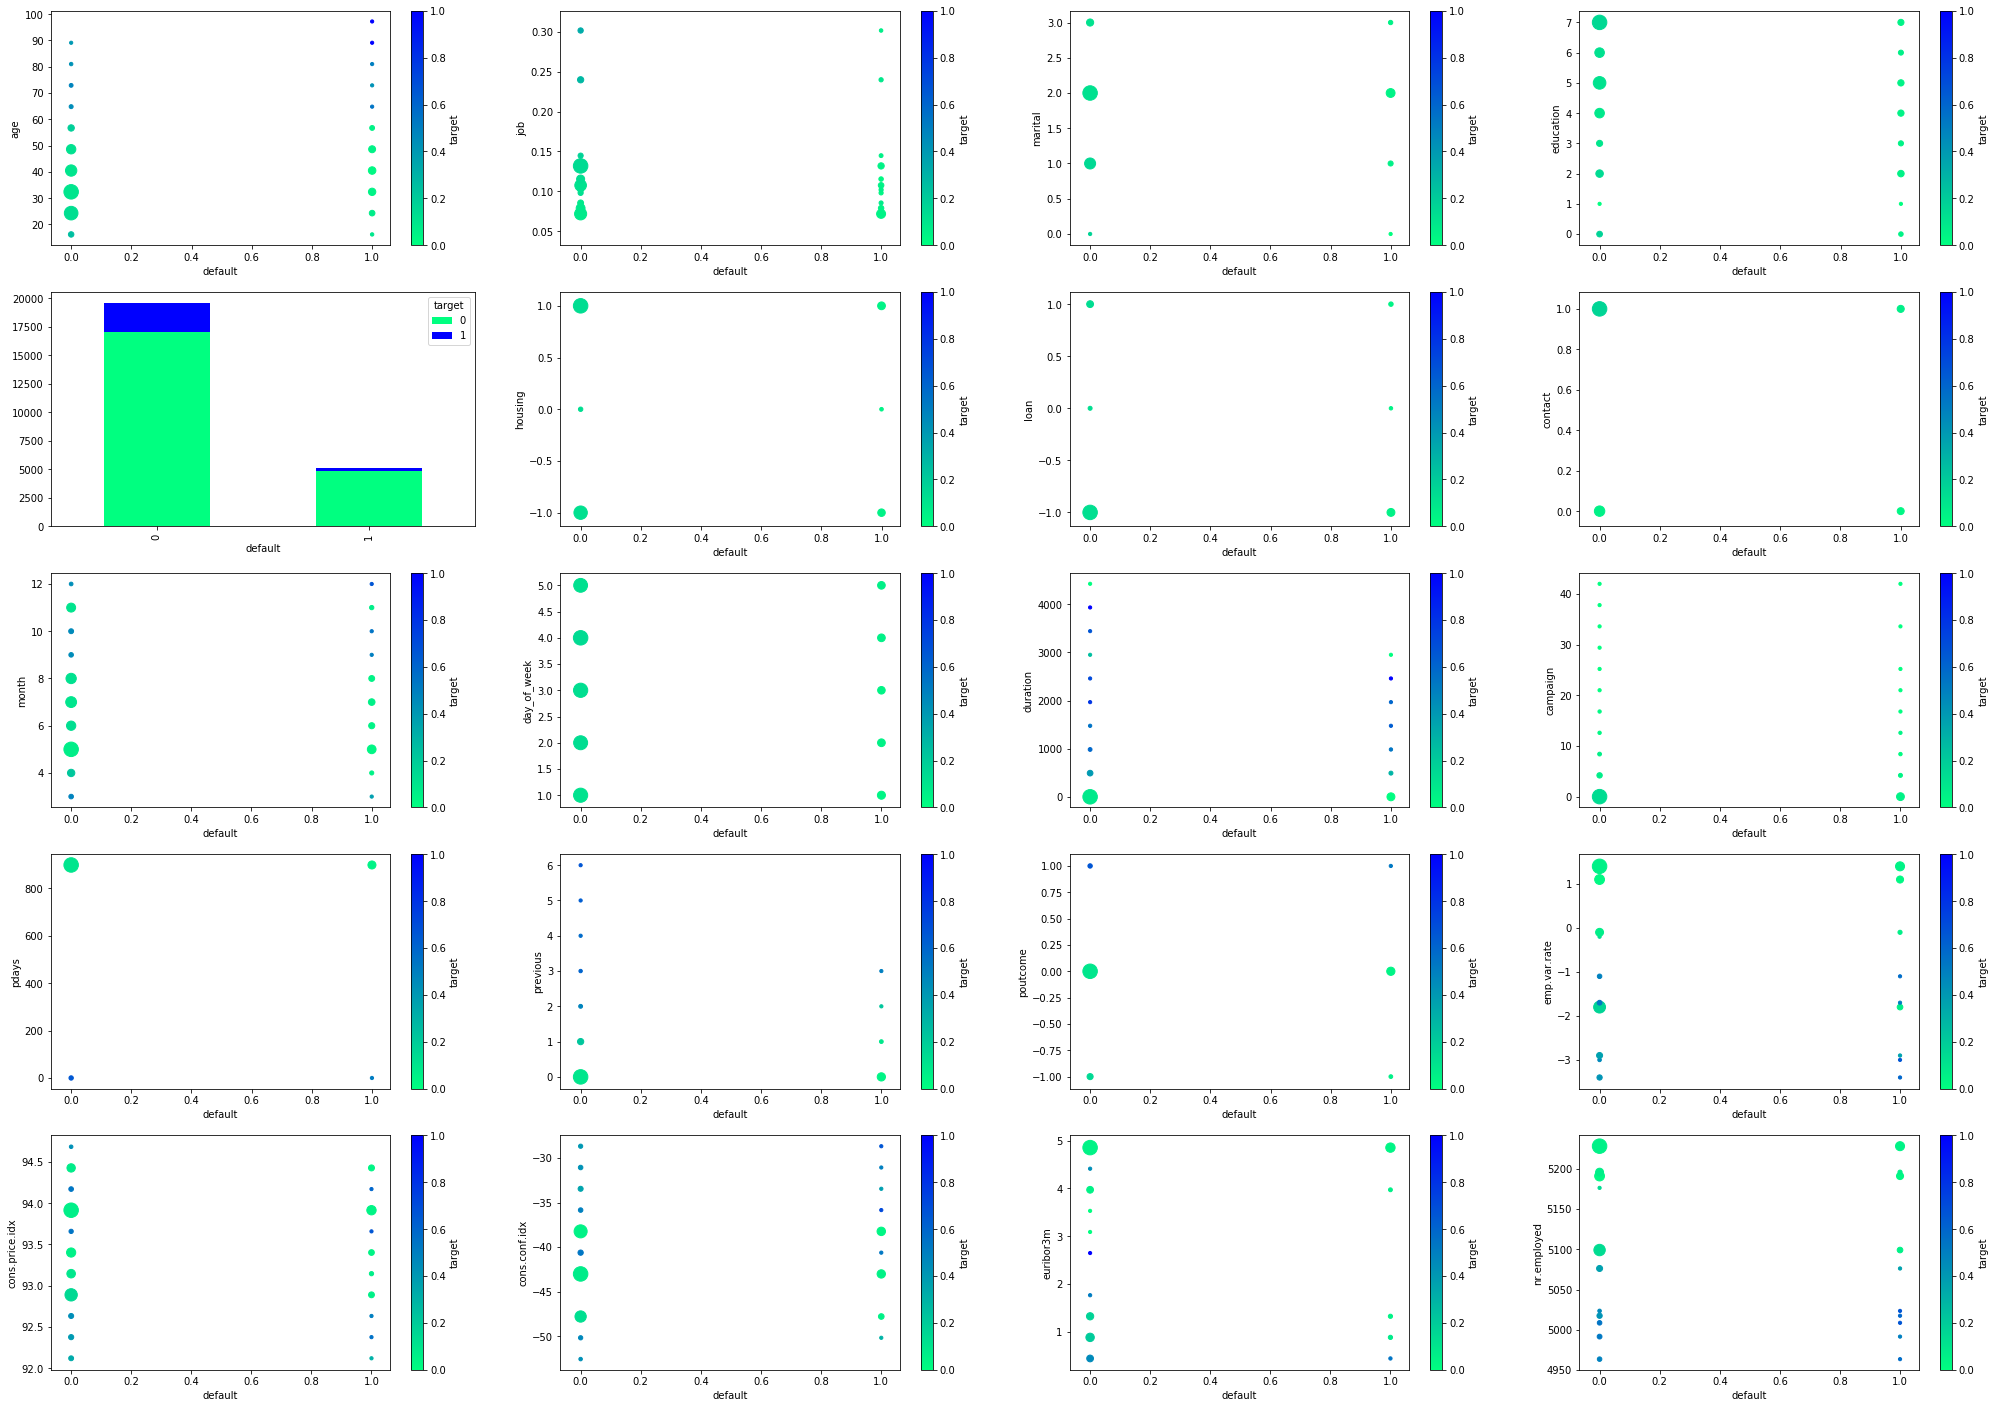

In [130]:
pairplot_feauter('default')

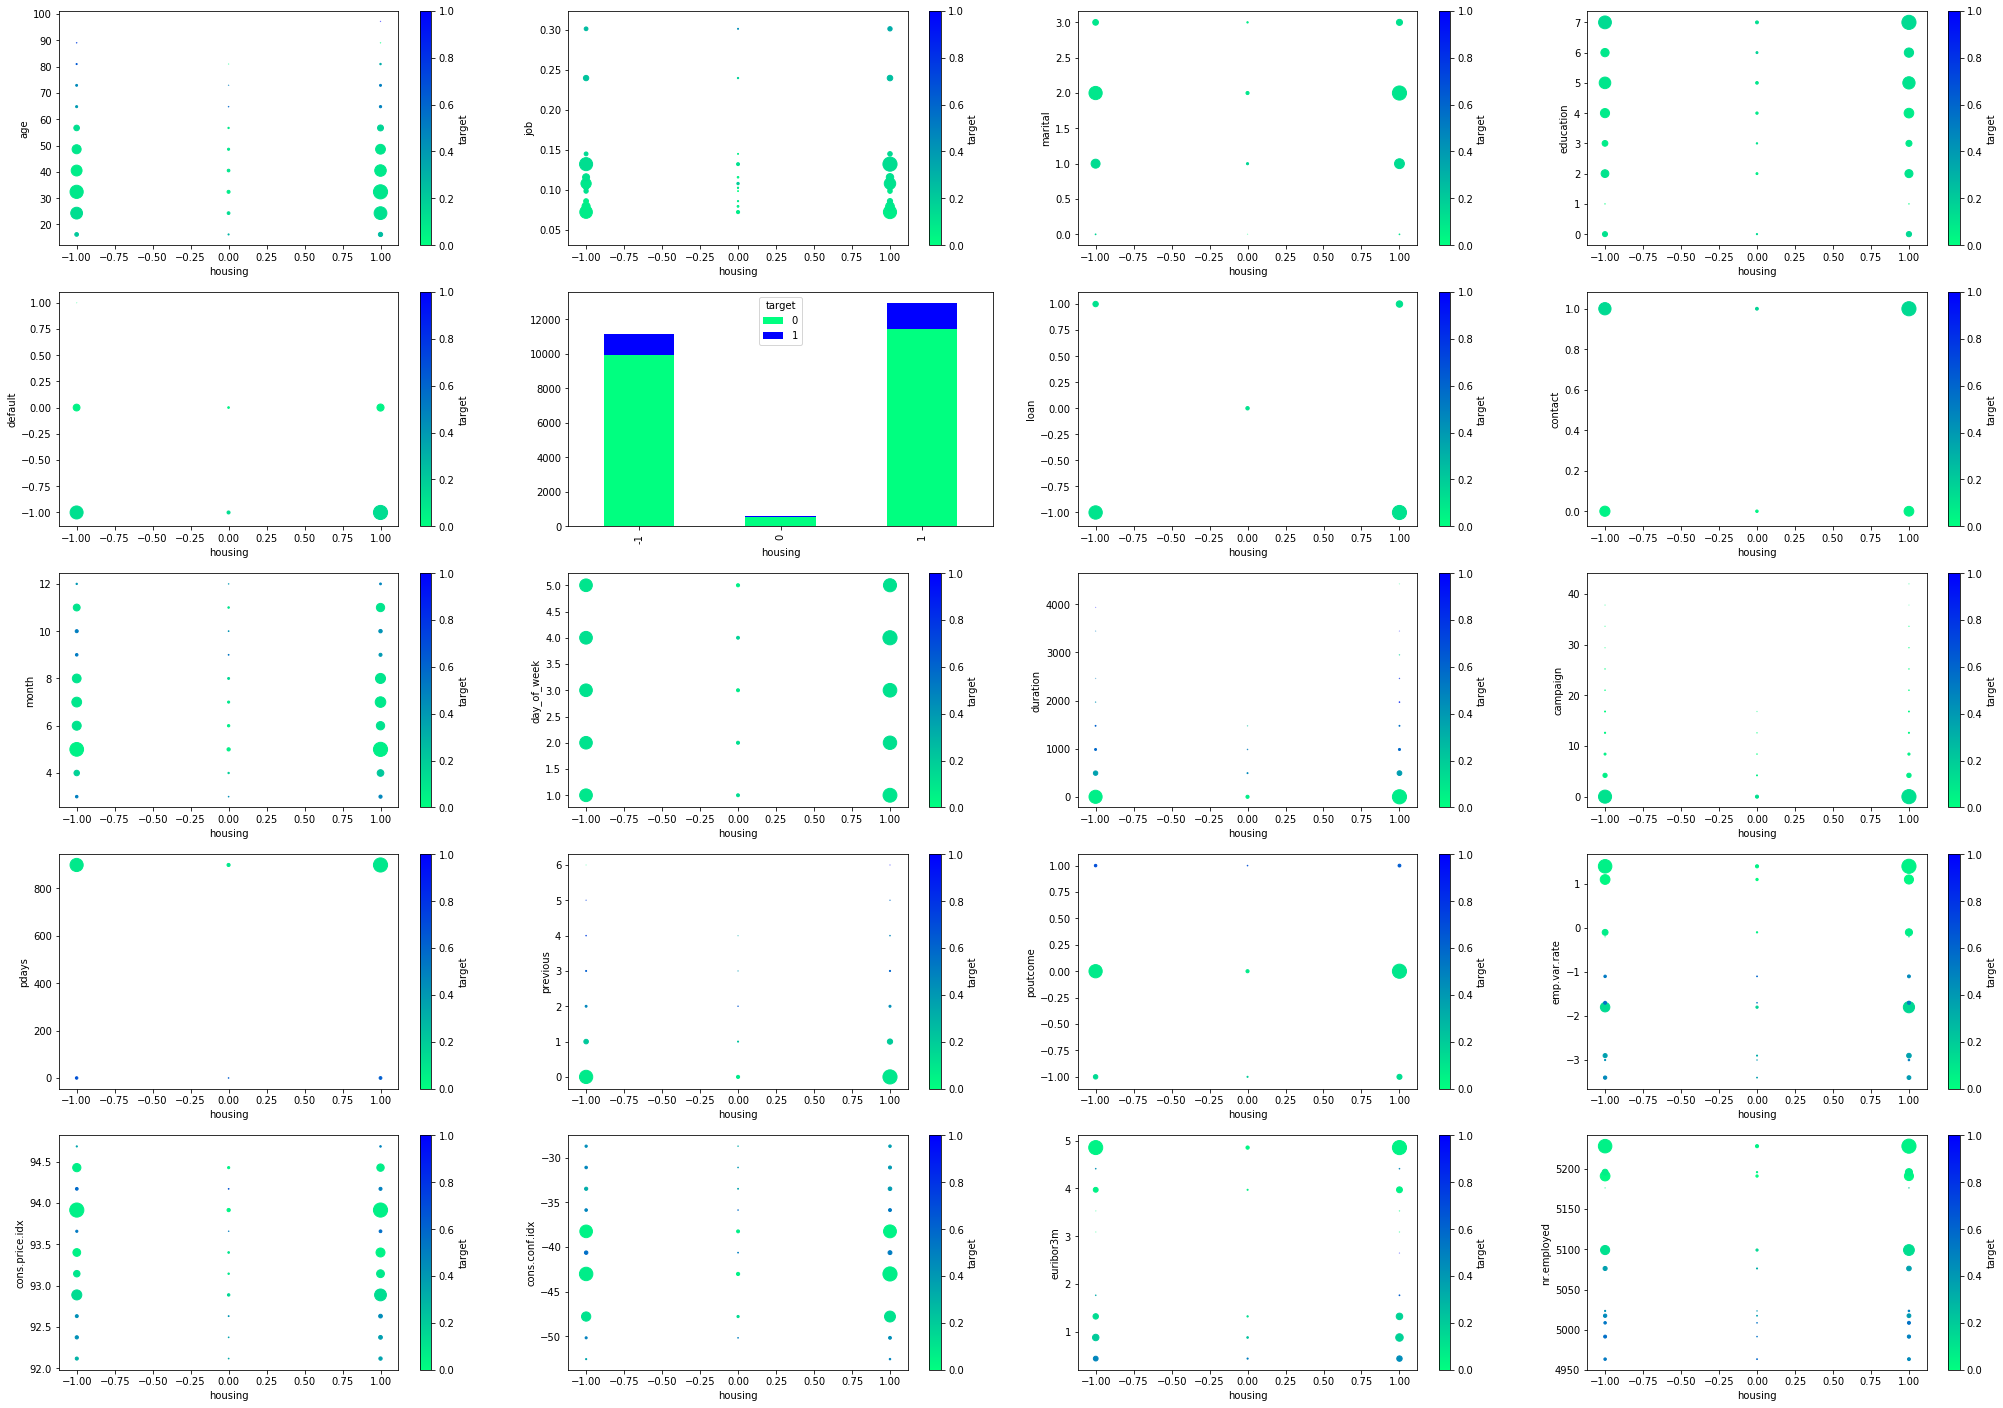

In [126]:
pairplot_feauter('housing')

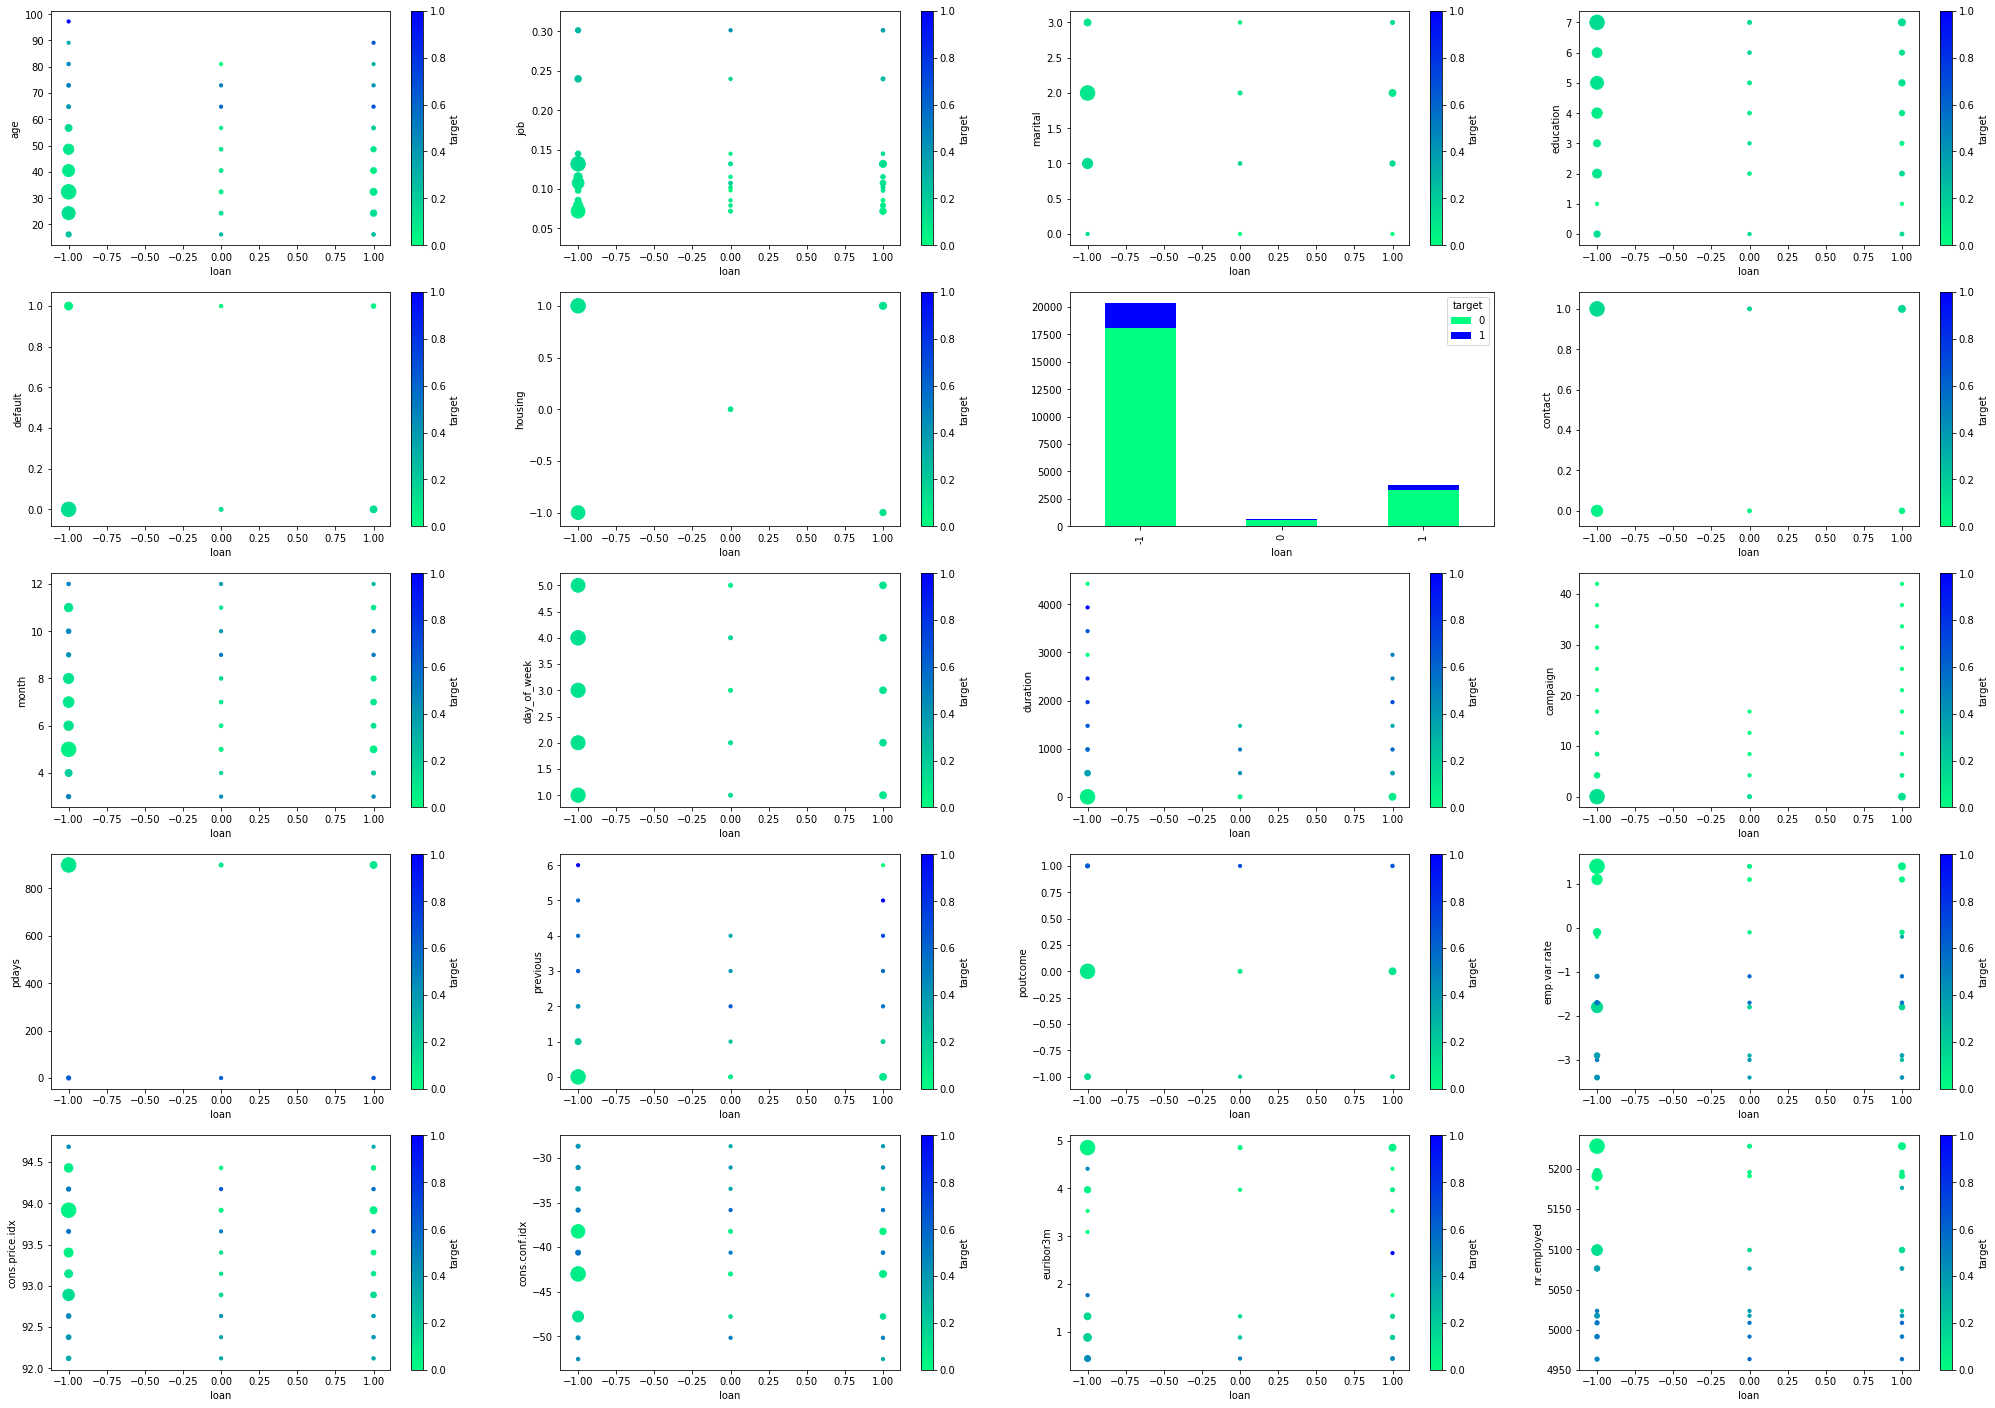

In [131]:
pairplot_feauter('loan')

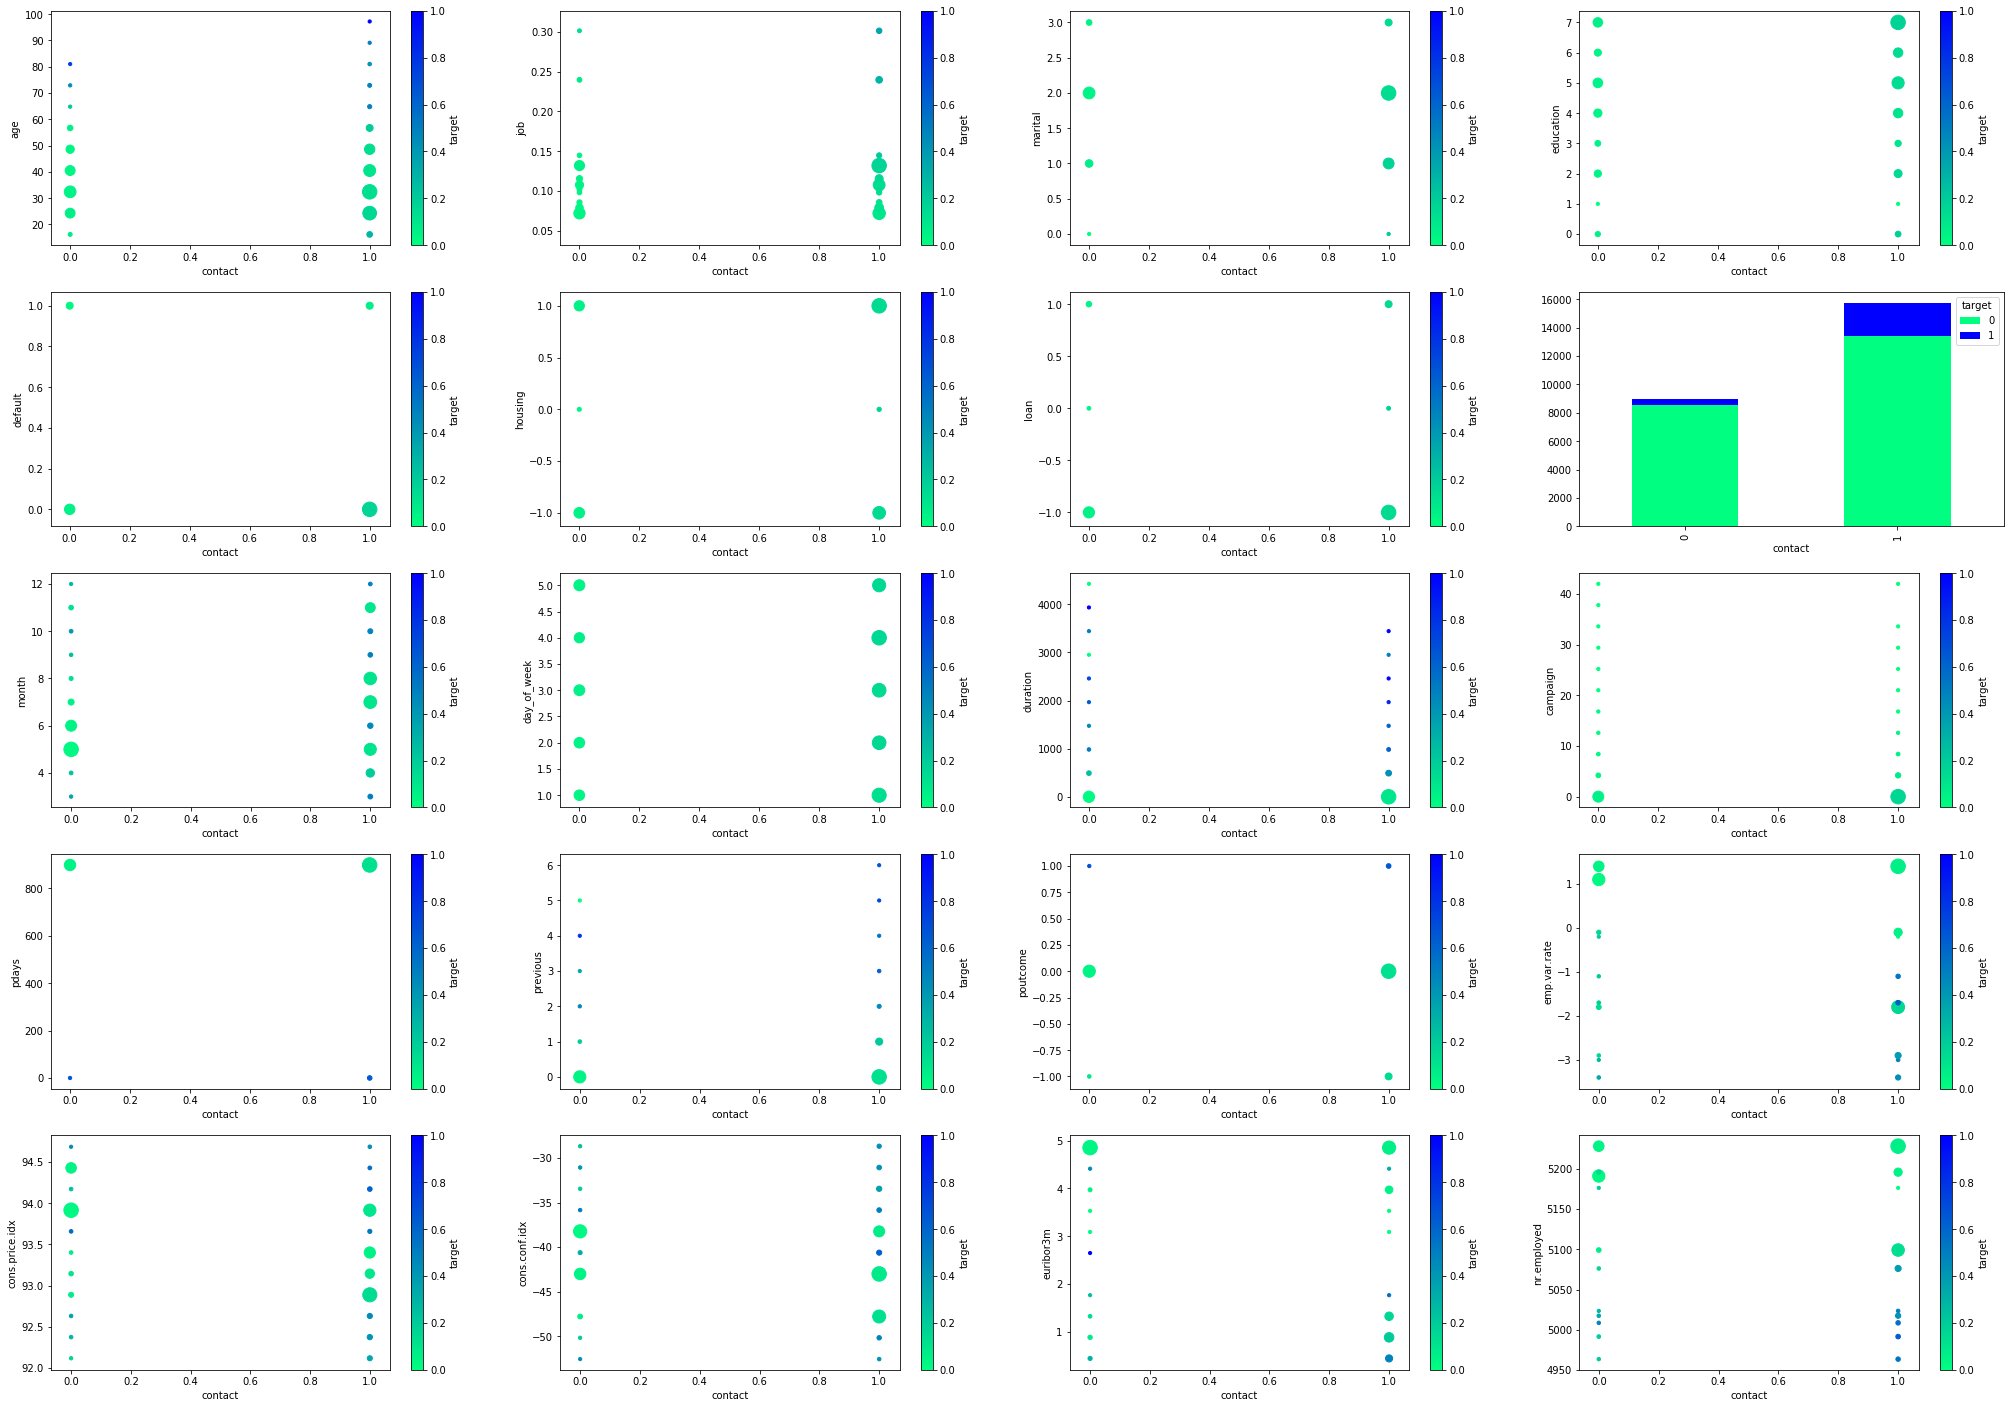

In [132]:
pairplot_feauter('contact')

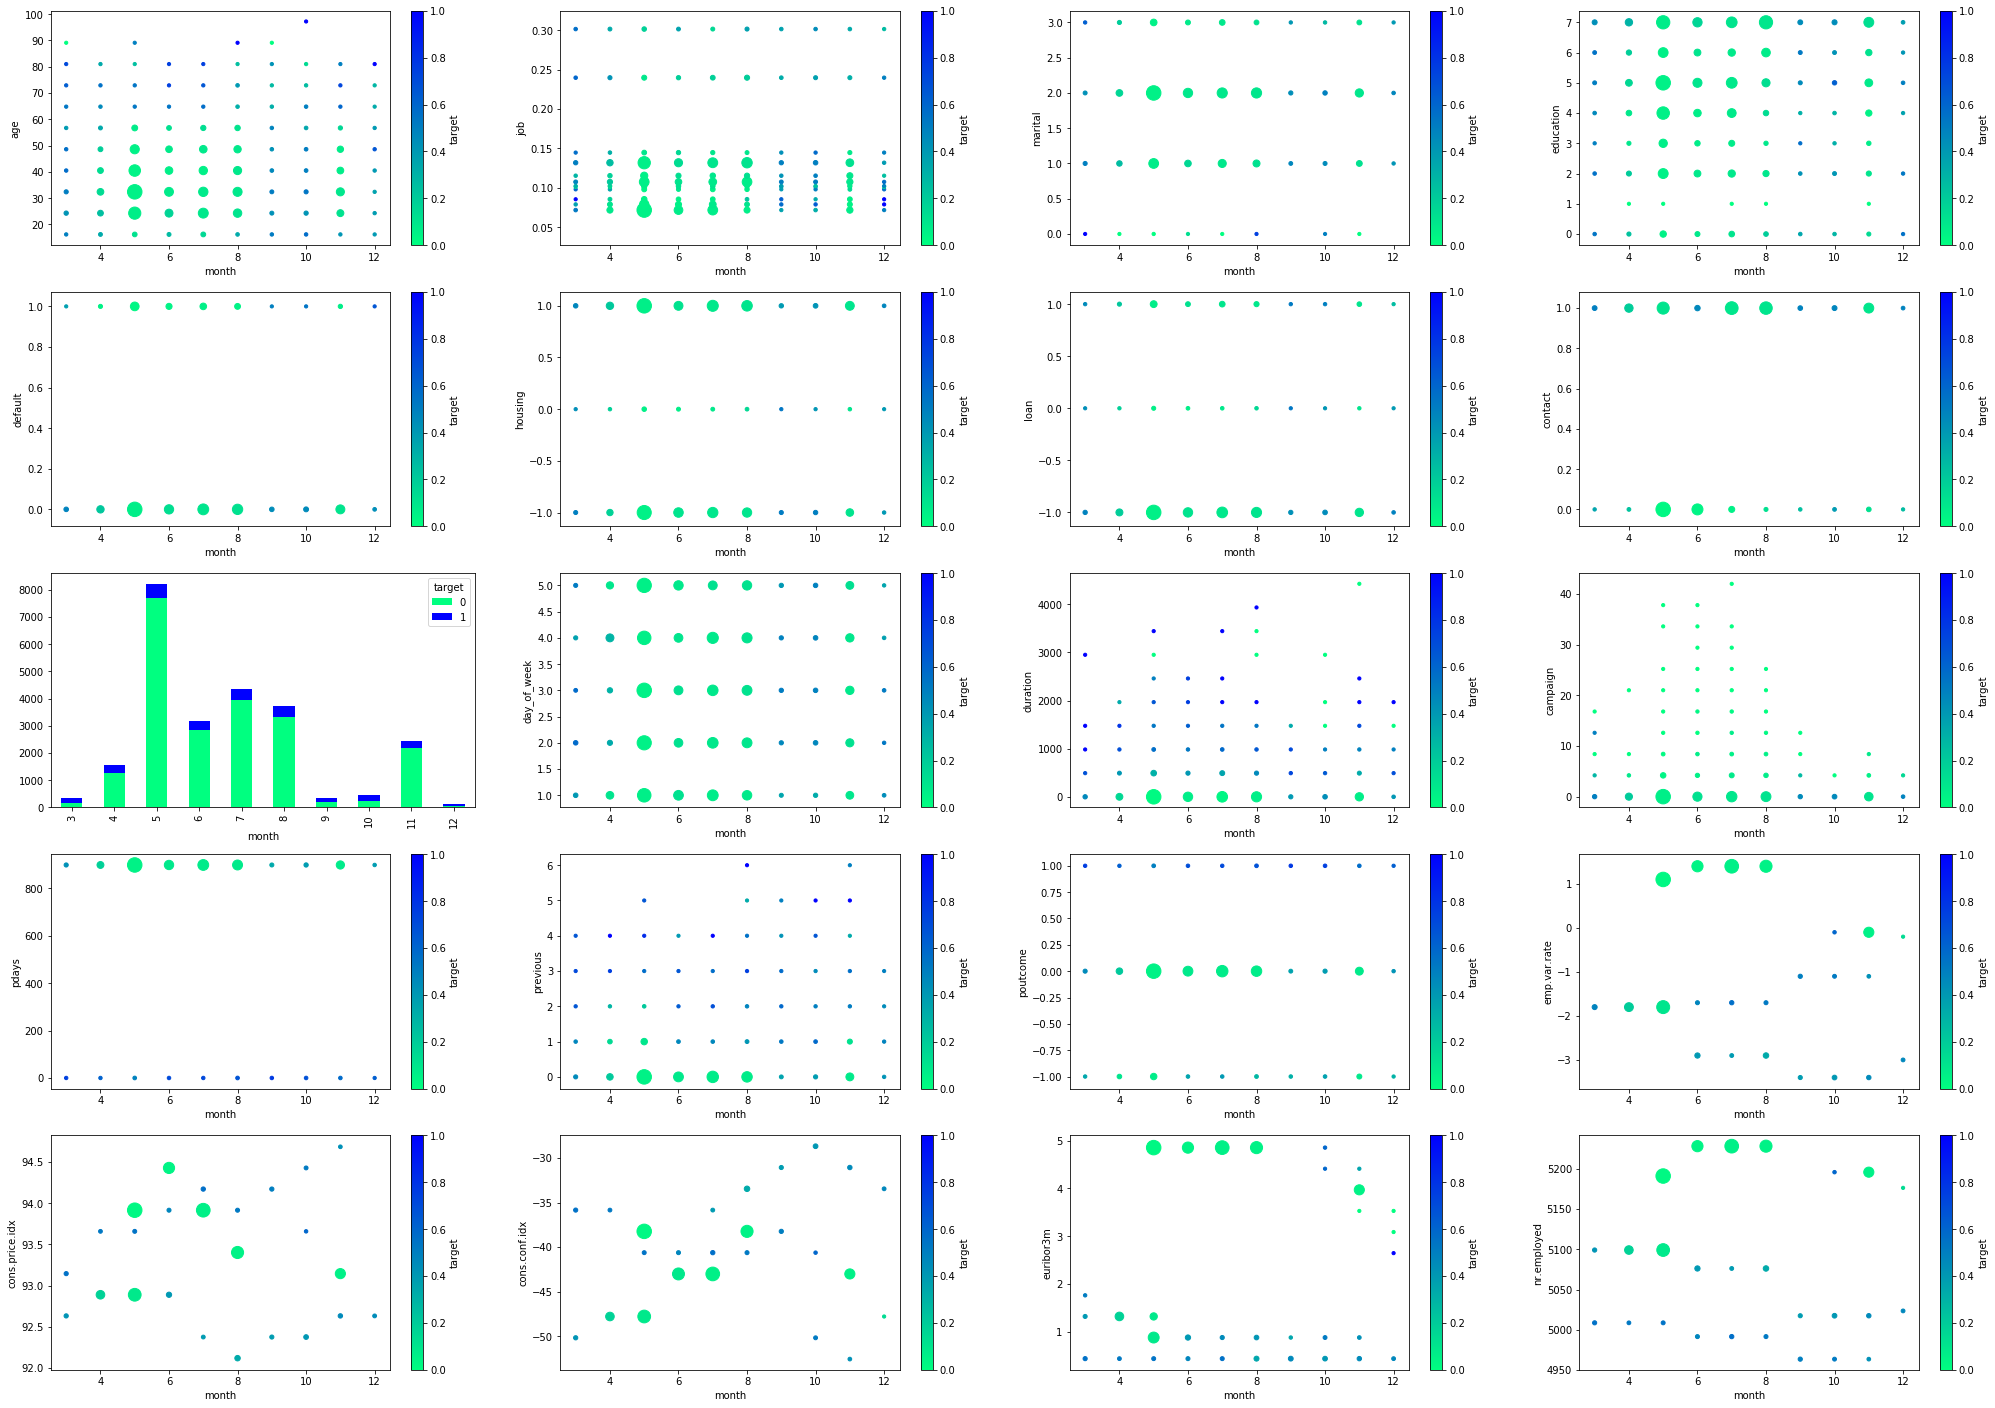

In [133]:
pairplot_feauter('month')

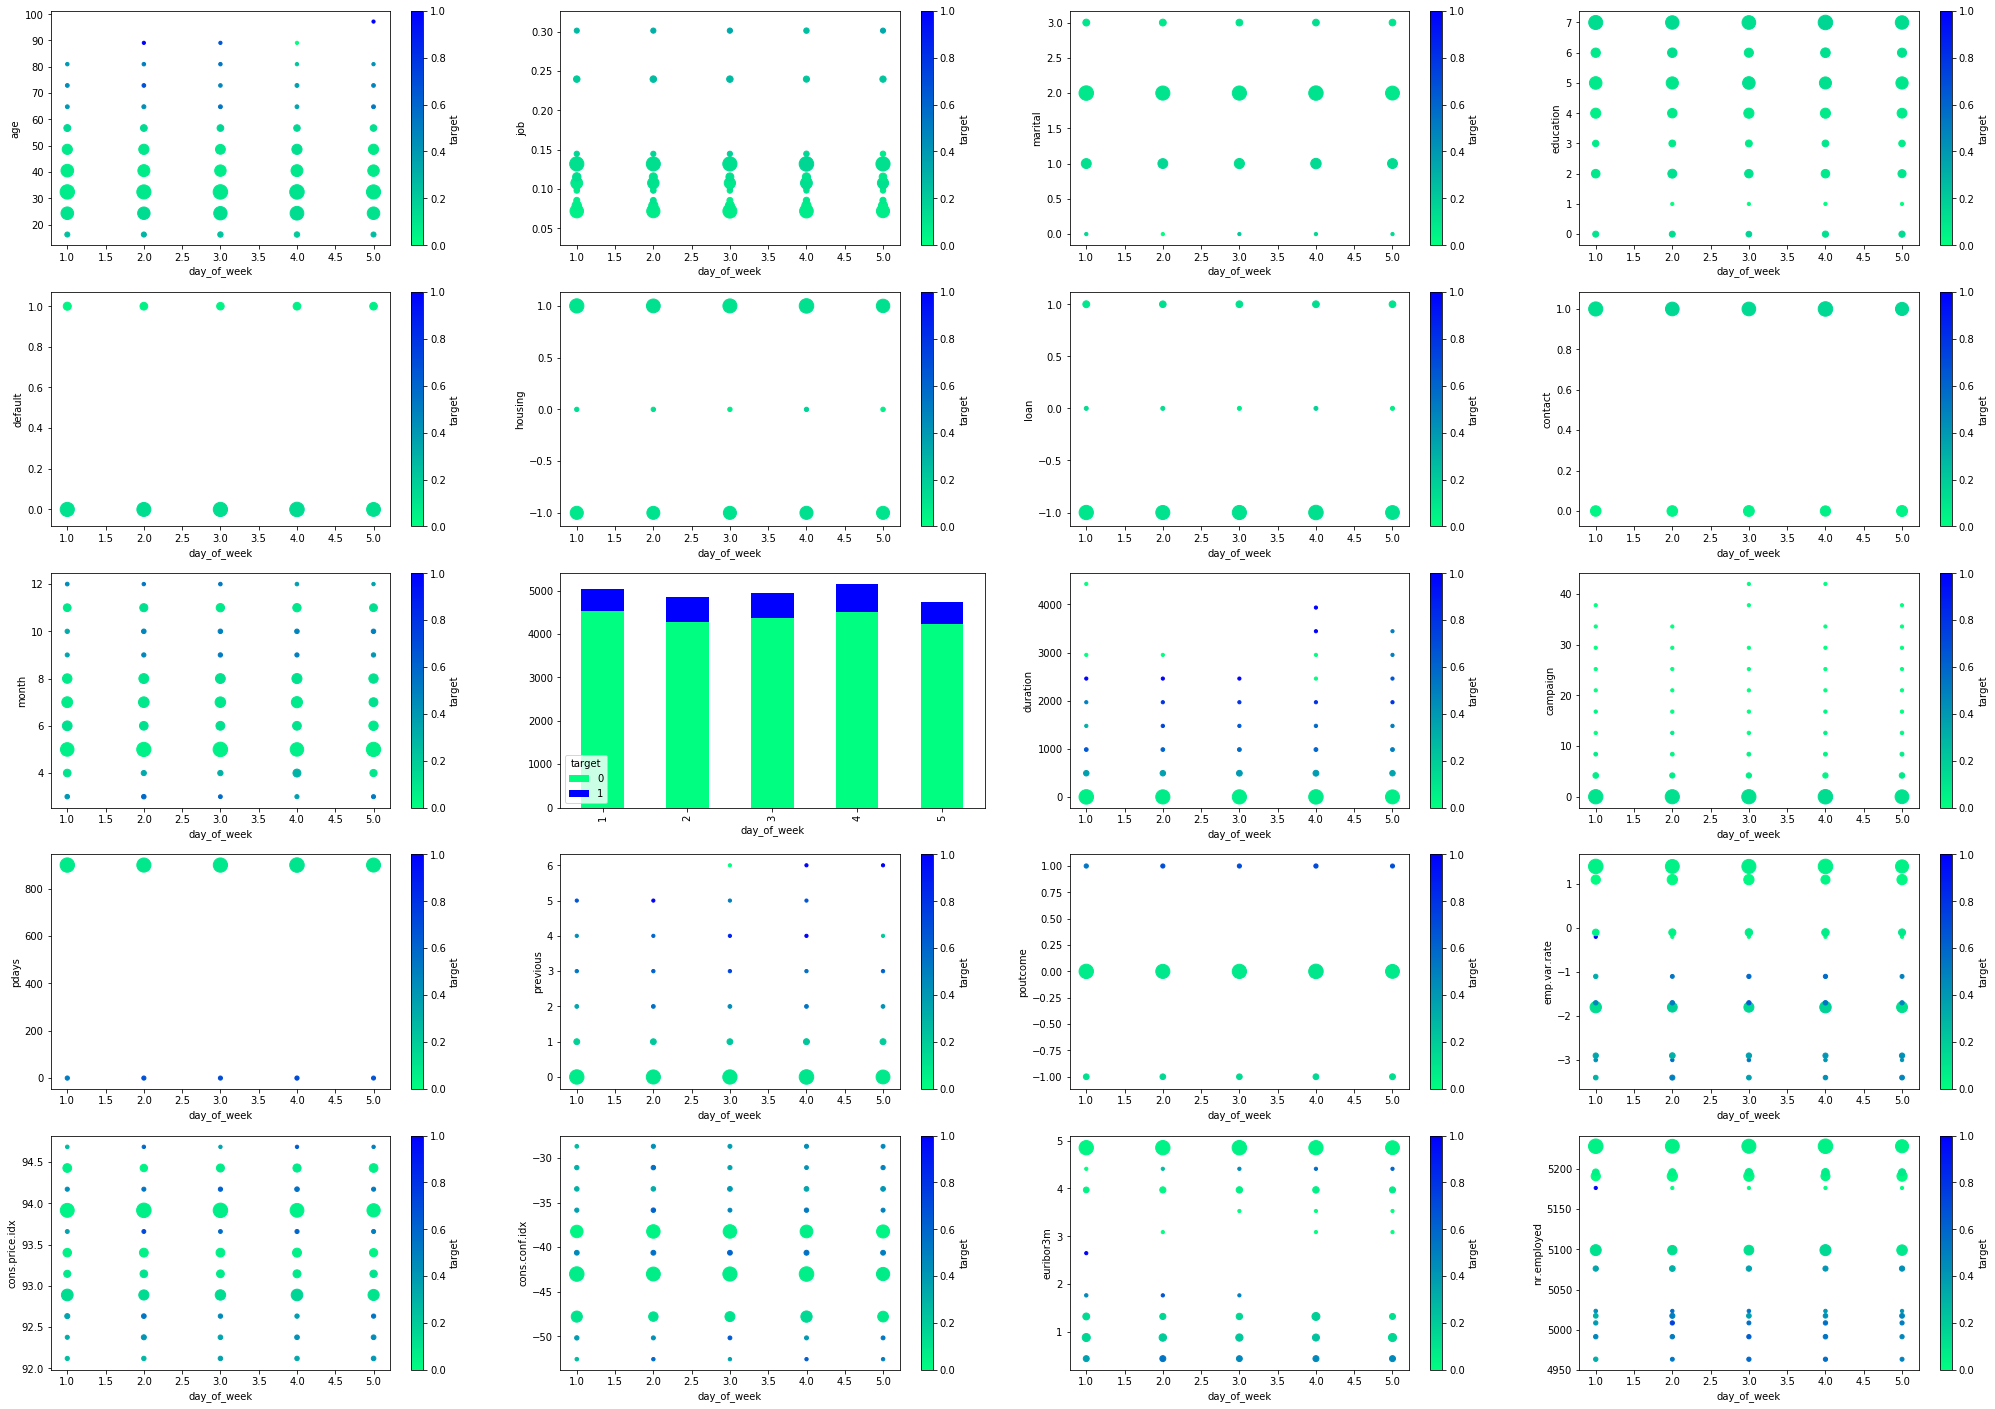

In [134]:
pairplot_feauter('day_of_week')

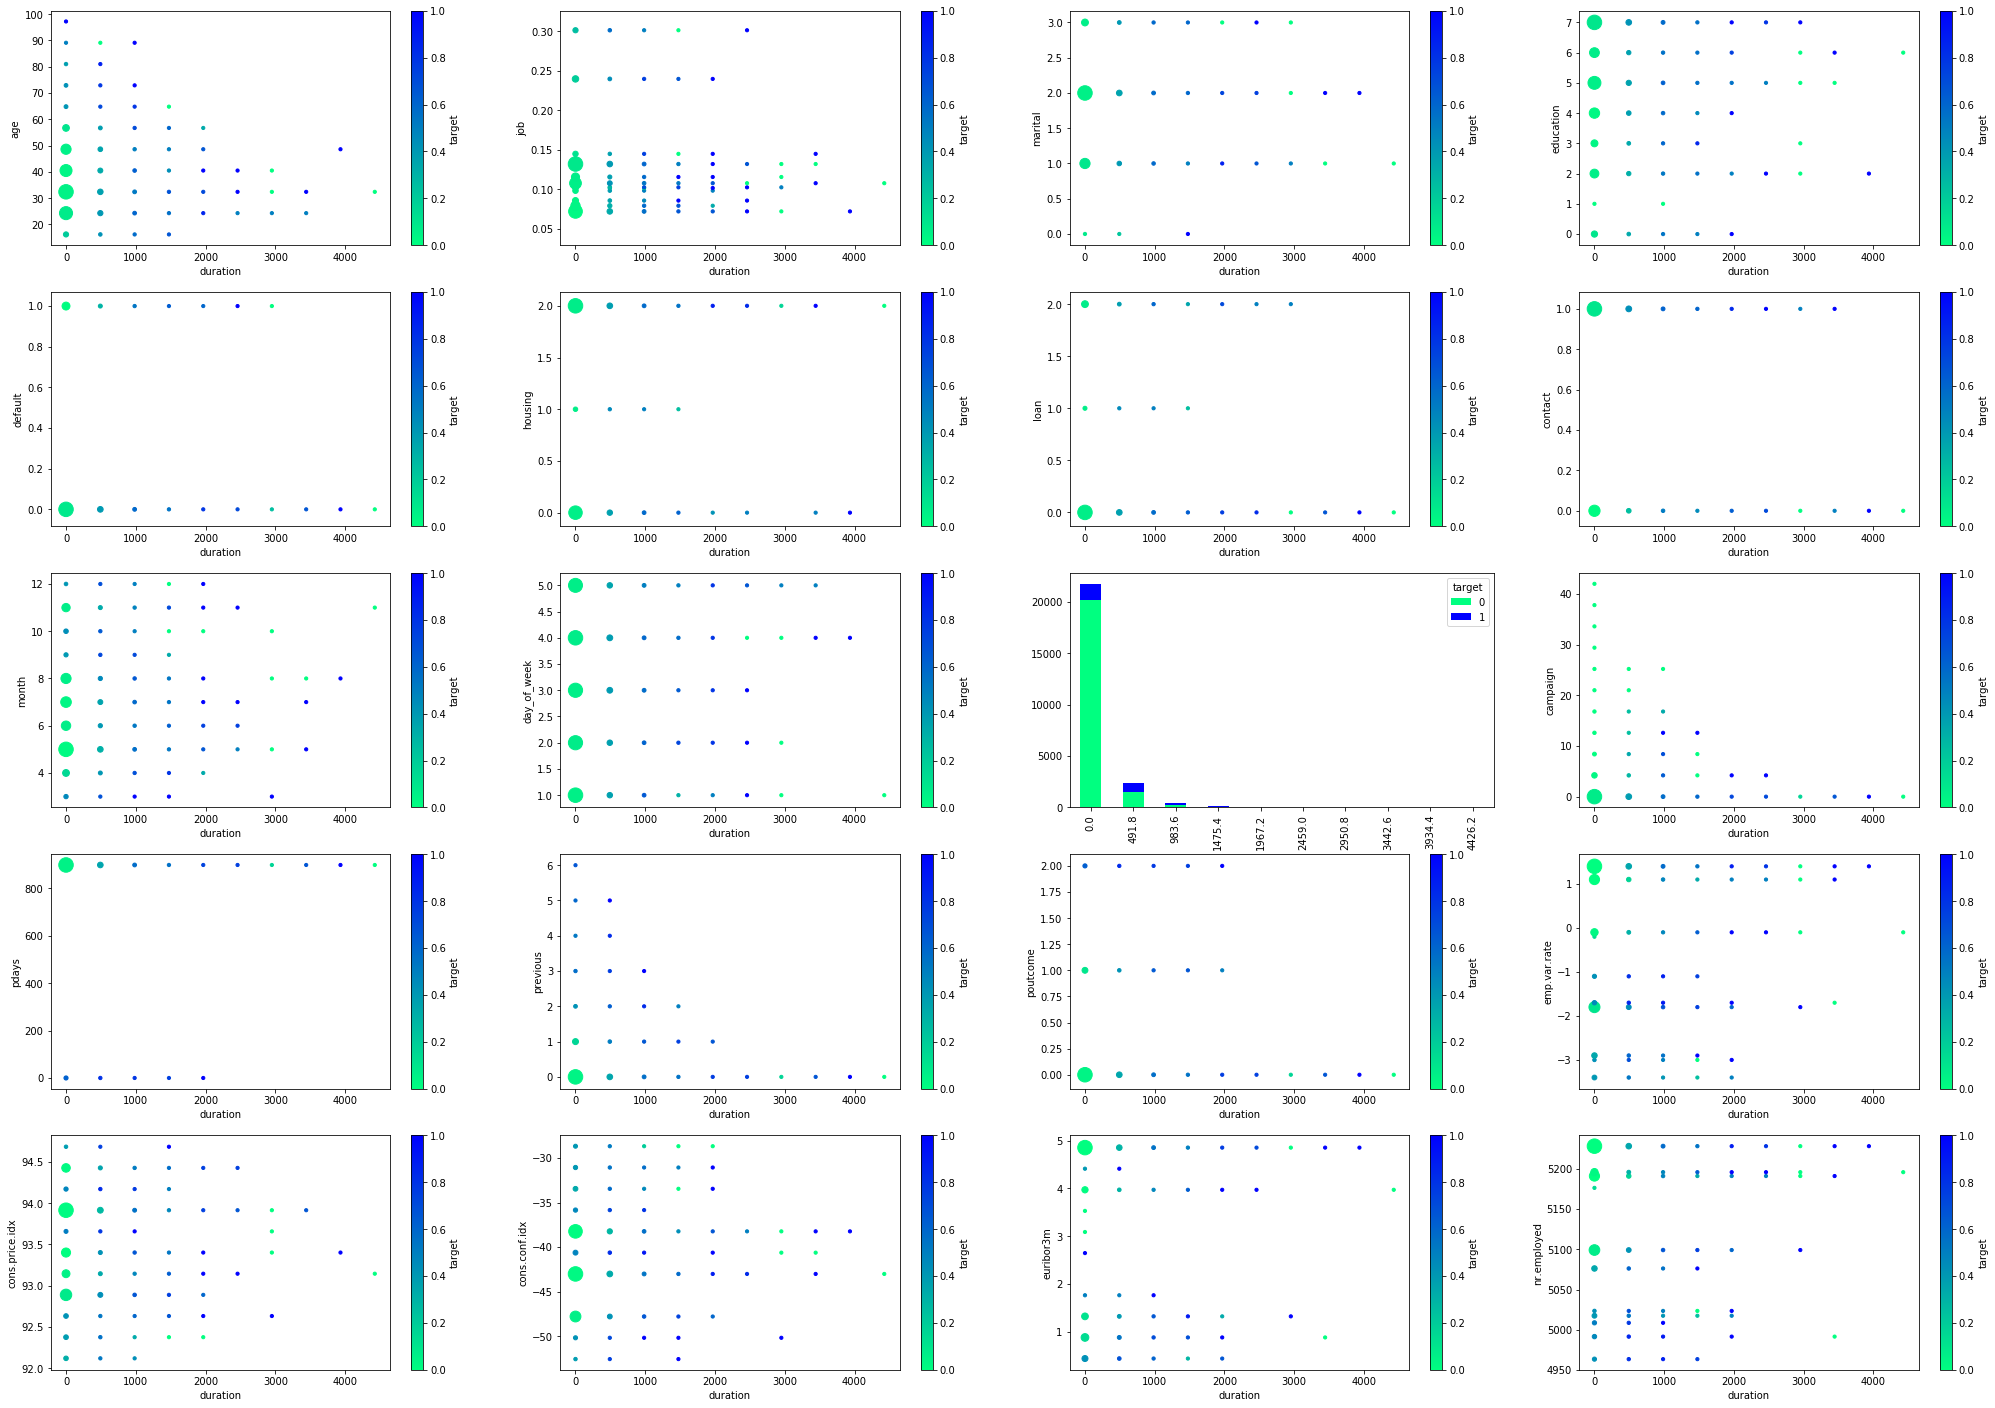

In [401]:
pairplot_feauter('duration')

In [143]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, log_loss, precision_score, recall_score, accuracy_score

In [373]:
def get_best_feauters(df, n_best_feauters):
    
    y = list(df['target'])
    X = df.drop(columns='target')
    
    rfe = RFE(DecisionTreeClassifier(max_depth=10, random_state = 42), n_best_feauters)
    fit_support = rfe.fit(X, y).support_
    
    return [x for idx, x in enumerate(X.columns) if fit_support[idx]]

def test_predict_probe_to_pairs(df, n_neighbors, feauters):
    
    y = list(df['target'])
    X = df.drop(columns='target')
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=42)
    
    feauter_pairs = get_feauters_combinations(feauters, 2) + get_feauters_combinations(feauters, 3) + get_feauters_combinations(feauters, 4)
    
    results = []
    
    for feauters in feauter_pairs:

        X_tr_f = X_tr[feauters]
        
        est_results =[]
        
        for name, estimator in [
            ['KNN', KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)],
            ['DTC', DecisionTreeClassifier(random_state=42)],
            ['LR', LogisticRegression(random_state=42)],
        ]:
            estimator.fit(X_tr_f, y_tr)
            predict_proba = estimator.predict_proba(X_ts[feauters])
            r_a_s = roc_auc_score(y_ts, predict_proba[:,1])
            l_l = log_loss(y_ts, predict_proba[:,1])
            
            descr = '{} Признаки: {}; log_loss: {:.4f}; roc_auc: {:.1%}'.format(
                name,
                ', '.join(feauters), 
                l_l,
                r_a_s
            )
        
            est_results.append([name, feauters, r_a_s, descr])
        
        est_results.sort(key=(lambda x: x[1]), reverse=True)
        
        results.append(est_results[0])
    
    if len(results)>0:
        results.sort(key=(lambda item: item[2]), reverse=True)
        return results

In [320]:
def get_estimator(name, n_neighbors):
    if name == 'KNN':
        return KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
    
    if name == 'DTC':
        return DecisionTreeClassifier(random_state=42)
    
    if name == 'LR':
        return LogisticRegression(random_state=42)

def add_predict_probe(df_train, df_test, feauter_pairs, n_neighbors):
    
    df = df_test.copy()
    
    y_tr = list(df_train['target'])
    X_tr = df_train.drop(columns='target')
    X_ts = (df_test.drop(columns='target') if 'target' in df_test.columns else df_test.copy())
    
    for e_name, feauters in [x[:2] for x in feauter_pairs]:

        estimator = get_estimator(e_name, n_neighbors)
        estimator.fit(X_tr[feauters], y_tr)
        
        df.loc[:, '_&_'.join(feauters)] = estimator.predict_proba(X_ts[feauters])[:,1]
    
    return df

In [532]:
### смотрим уникальнеые комбинации (уже справочно)
cols = get_feauters_combinations(mt.columns, 4)
r=[]
for c in cols:
    r.append([c, mt.groupby(c).count().shape])
    
r.sort(key=(lambda x: x[1]), reverse=True)
r[:20]

[[['age', 'job', 'month', 'duration'], (4712, 17)],
 [['age', 'job', 'duration', 'nr.employed'], (4369, 17)],
 [['age', 'job', 'duration', 'emp.var.rate'], (4170, 17)],
 [['age', 'education', 'month', 'duration'], (3994, 17)],
 [['age', 'job', 'education', 'duration'], (3952, 17)],
 [['age', 'job', 'day_of_week', 'duration'], (3879, 17)],
 [['job', 'education', 'month', 'duration'], (3812, 17)],
 [['job', 'month', 'day_of_week', 'duration'], (3693, 17)],
 [['age', 'education', 'duration', 'nr.employed'], (3651, 17)],
 [['job', 'education', 'duration', 'nr.employed'], (3581, 17)],
 [['age', 'month', 'day_of_week', 'duration'], (3535, 17)],
 [['age', 'education', 'duration', 'emp.var.rate'], (3475, 17)],
 [['job', 'day_of_week', 'duration', 'nr.employed'], (3473, 17)],
 [['job', 'education', 'duration', 'emp.var.rate'], (3414, 17)],
 [['age', 'day_of_week', 'duration', 'nr.employed'], (3326, 17)],
 [['job', 'day_of_week', 'duration', 'emp.var.rate'], (3275, 17)],
 [['age', 'education', '

In [378]:
def prepare_data_test(df_train, df_test):
    
    if 'targetd' in df_test.columns:
        df_test = df_test.drop(columns='target')
        
    df_train = map_categories(df_train, category_mapper, category_ohe)
    
    columns = list(df_train.columns)
    columns.remove('target')
    
    best_feauters = get_best_feauters(df_train, 10)
    
    bad_feauters = [x for x in columns if not (x in best_feauters)]
    
    print('test_predict_probe_to_pairs')
    feauter_combinations = test_predict_probe_to_pairs(
        df_train, 
        64,
        bad_feauters
    )[:64]
    
    print('add_predict_probe df_train')
    y = list(df_train['target'])
    X = add_predict_probe(
        df_train, 
        df_train.drop(columns='target'), 
        feauter_combinations, 
        64
    )
        
    rfe = RFE(DecisionTreeClassifier(max_depth=10, random_state = 42), 15)
    fit = rfe.fit(X, y)
    X_best_feautures = [x for idx, x in enumerate(X.columns) if fit.support_[idx]]
    
    print('prepare df_test sarted')
    
    df_test = map_categories(df_test, category_mapper, category_ohe)
    
    print('add_predict_probe df_test')
    df_test = add_predict_probe(
        df_train, 
        df_test, 
        feauter_combinations, 
        64
    )
    
    print('PCA df_test')
    pca = PCA(n_components=15)
    fit = pca.fit(df_test)
    
    df_test = pd.merge(
        pd.DataFrame(fit.transform(df_test), index=df_test.index).reset_index(),
        df_test.reset_index()[X_best_feautures+['_id']], on='_id'
    ).set_index('_id')
    
    print('prepare_data_test complete')
    return df_test

In [512]:
%%time
X = prepare_data_test(train, train)

test_predict_probe_to_pairs
add_predict_probe df_train
prepare df_test sarted
add_predict_probe df_test
PCA df_test
prepare_data_test complete
Wall time: 7min 36s


In [513]:
y = list(train['target'])

In [381]:
%%time

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

dtc_ra = cross_val_score(
    DecisionTreeClassifier(max_depth=6, random_state = 42),
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X, y)
).mean()


rfc_ra = cross_val_score(
    RandomForestClassifier(n_estimators=100, random_state = 42),
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X, y)
).mean()

lr_ra = cross_val_score(
    LogisticRegression(random_state = 42),
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X, y)
).mean()

knn_ra = cross_val_score(
    KNeighborsClassifier(100),
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X, y)
).mean()

print(
    'ROC_AUC.mean(): DTC={:.2%}; RFC={:.2%}; LR={:.2%}; KNN={:.2%}'.format(
        dtc_ra,rfc_ra,lr_ra,knn_ra
    )
)

ROC_AUC.mean(): DTC=93.50%; RFC=95.56%; LR=95.36%; KNN=92.89%
Wall time: 1min 6s


In [176]:
from sklearn.cross_validation import train_test_split

In [217]:
def test_model(X, y, estimator, descr = 'test_model'):
    
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=42)
    
    estimator.fit(X_tr, y_tr)
    predict_proba = estimator.predict_proba(X_ts)
    predict = estimator.predict(X_ts)
    
    print('{}: roc_auc = {:.2%}, precision= {:.2%}, recall={:.2%}, log_loss={:.2%}'.format(
        descr,
        roc_auc_score(y_ts, predict_proba[:,1]),
        precision_score(y_ts, predict),
        recall_score(y_ts, predict),
        log_loss(y_ts, predict_proba)
    ))

In [271]:
def test_predict_by_feauters(X, y, feauters):
    X = X[feauters]
    test_model(X, y, DecisionTreeClassifier(max_depth=5, random_state = 42), 'DTC 5')
    test_model(X, y, DecisionTreeClassifier(max_depth=7, random_state = 42), 'DTC 7')
    test_model(X, y, DecisionTreeClassifier(max_depth=10, random_state = 42), 'DTC 10')
    test_model(X, y, DecisionTreeClassifier(max_depth=15, random_state = 42), 'DTC 15')
    test_model(X, y, RandomForestClassifier(max_depth=5, n_estimators=100, random_state = 42, n_jobs=-1), 'RFC 5')
    test_model(X, y, RandomForestClassifier(max_depth=7, n_estimators=100, random_state = 42, n_jobs=-1), 'RFC 7')
    test_model(X, y, RandomForestClassifier(max_depth=10, n_estimators=100, random_state = 42, n_jobs=-1), 'RFC 10')
    test_model(X, y, RandomForestClassifier(max_depth=15, n_estimators=100, random_state = 42, n_jobs=-1), 'RFC 15')
    test_model(X, y, LogisticRegression(random_state = 42), 'LR')

In [514]:
test_predict_by_feauters(X, y, X.columns)

DTC 5: roc_auc = 92.54%, precision= 69.62%, recall=52.19%, log_loss=19.22%
DTC 7: roc_auc = 92.20%, precision= 75.44%, recall=55.40%, log_loss=31.39%
DTC 10: roc_auc = 85.37%, precision= 74.90%, recall=66.90%, log_loss=105.47%
DTC 15: roc_auc = 76.12%, precision= 69.53%, recall=68.21%, log_loss=205.83%
RFC 5: roc_auc = 95.01%, precision= 80.99%, recall=44.48%, log_loss=17.90%
RFC 7: roc_auc = 96.03%, precision= 82.67%, recall=54.33%, log_loss=16.16%
RFC 10: roc_auc = 96.85%, precision= 84.27%, recall=62.28%, log_loss=14.41%
RFC 15: roc_auc = 97.42%, precision= 84.55%, recall=68.80%, log_loss=13.03%
LR: roc_auc = 93.53%, precision= 70.27%, recall=47.09%, log_loss=19.61%


## Предсказываем

In [515]:
%%time

X_ts = prepare_data_test(train, X_test)

estimator = RandomForestClassifier(max_depth=15, n_estimators=100, random_state = 42, n_jobs=-1)
estimator.fit(X, y)
predict = estimator.predict(
    X_ts
)

test_predict_probe_to_pairs
add_predict_probe df_train
prepare df_test sarted
add_predict_probe df_test
PCA df_test
prepare_data_test complete
Wall time: 6min 58s


In [516]:
y_test = pd.DataFrame(predict, X_test.index, columns=['target'])

In [517]:
y_test.head()

,target
_id,
66810d8e6bf2b41c880a7bc6c8a1e295,0
ccac3879652b08cb8b44c1920fd93afa,0
fcccab4d7a76f70647f015f2c84c2af8,0
ed8399278c30678dab739045fa12b440,0
1d4d62ac5cabcb48bac7112813f290cb,0


In [519]:
y_test.to_csv('submission-13-05-2018_02_32.csv')